# Data preparation and analysis

# A. Problem statement

 The problem at Delta Bank is to develop a customer experience vision, with a focus on customer retention. In order to strengthen the relationship with their clients and keep them engaged, the business officers want to identify the most probable customers that will churn in the future, and understand the drivers that are causing customers to leave the bank. Due to cost limitations, it is not possible to target all customers, so the marketing team needs to prioritize their efforts. As a data scientist, your task is to help the business officers and marketing team by identifying the most probable churners and explaining the most important factors that are contributing to customer churn.

# B. Import libraries

In [2]:
import numpy as np #for linear algebra
import pandas as pd #for data processing, dataset reading etc
import matplotlib.pyplot as plt #for plotting
import seaborn as sns # for "fancy" plotting
import missingno as msno # for outliers,plots

#import sklearn ## pachet pentru data science (in general)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,roc_curve

import shap
import pickle


# C. Read dataset

In [3]:
path='C:\\Users\\rares\\Desktop\\TTJ project\\dataset\\dataset.csv'

In [4]:
data=pd.read_csv(path)

# Exploratory data analysis

## 1. General

a)View initial dimensions of dataset

In [5]:
data.shape

(10127, 21)

b)Preview of dataset

In [6]:
data.head(15)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40.0,F,4.0,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44.0,M,2.0,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51.0,M,4.0,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32.0,M,0.0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37.0,M,3.0,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48.0,M,2.0,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


c) View types of columns

In [7]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

d) View information about dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10124 non-null  float64
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10122 non-null  float64
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10125 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

e) View statistical properties of the 'object' type fields

In [9]:
data.describe(include = ['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,8608,9378,10125,10127
unique,2,2,6,3,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3560,9436


## 2. Univariate analysis

We want to analyze our target variable ("Attrition_Flag")

a) Check if the variable has missing values

In [10]:
data['Attrition_Flag'].isnull().sum()

0

b) View unique values

In [11]:
data['Attrition_Flag'].nunique()

2

In [12]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

c) View frequency of values and percentage of frequency

In [13]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [14]:
data['Attrition_Flag'].value_counts()/len(data)*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

Based on the data, we can see that 83.93% of the values correspond to 'Existing Customer', indicating that the client is likely to continue using the service. The remaining 16.06% correspond to 'Attrited Customer', suggesting that the customer is likely to churn in the future.

d)Visualize frequency distribution of variable 'Attrition_Flag'

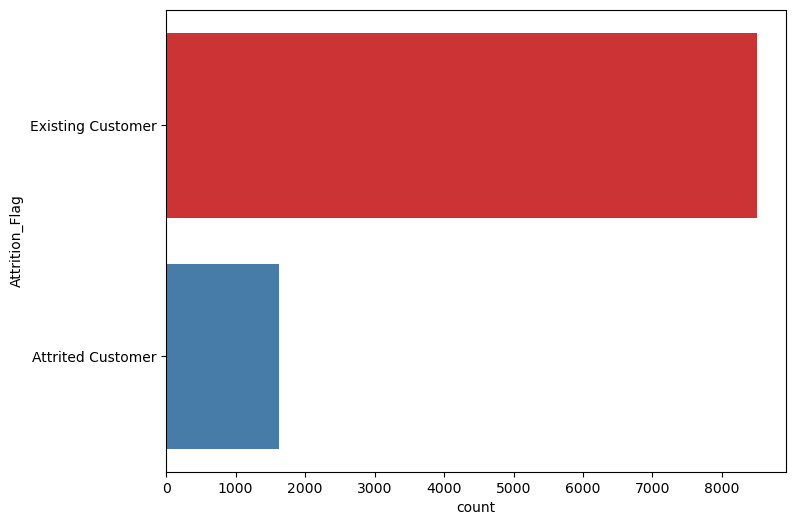

In [15]:
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data = data,y = 'Attrition_Flag', palette='Set1')
plt.show()

e)Change labels of variable 'Attrition_Flag' to numeric

In [16]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})

In [17]:
data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

The target variable has 2 values :"Existing Customer" and "Attrited Customer" and after the transformation they've become 0 and 1.

## 3. Feature analysis

### 3.1 Categorical variables

a)Explore categorical variables

In [18]:
#Find categorical variables
data.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [19]:
#Select categorical variables
categorical_columns = [col for col in data.columns if data[col].dtypes == 'object']

In [20]:
print('There are ', len(categorical_columns),' categorical variables.These are',categorical_columns)

There are  5  categorical variables.These are ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [21]:
data[categorical_columns].head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,NaN,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


Check distribution of categorical variables in relationship with target 'Attrition_Flag'

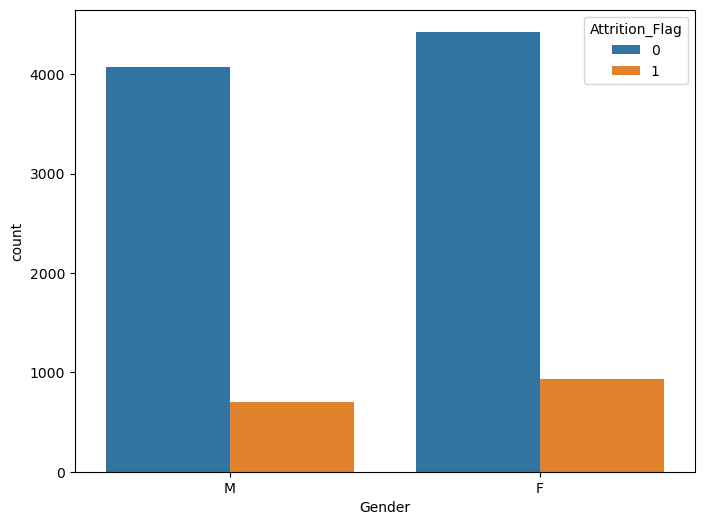

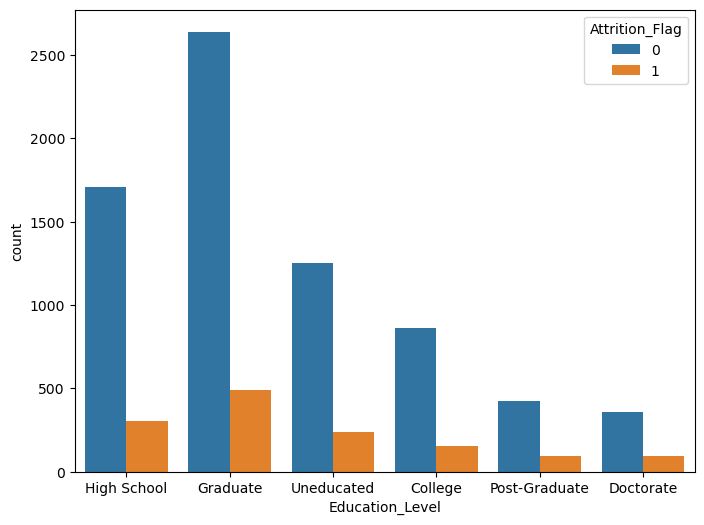

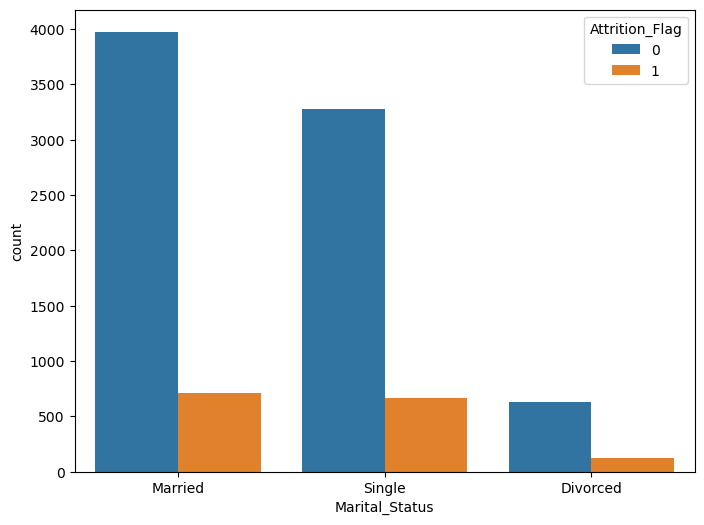

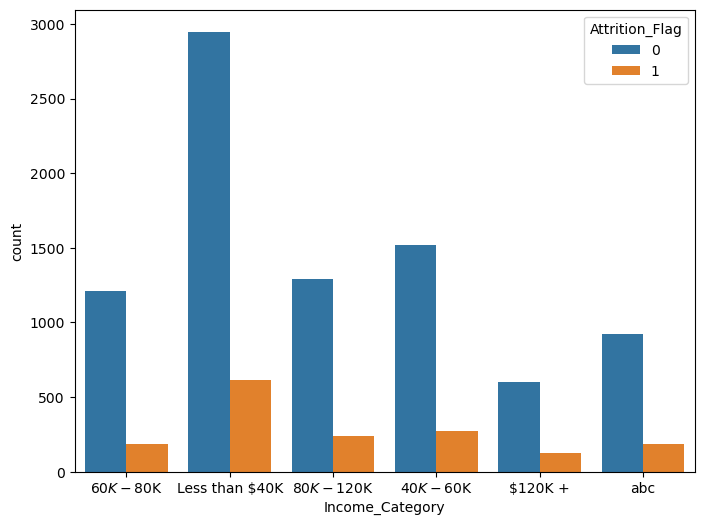

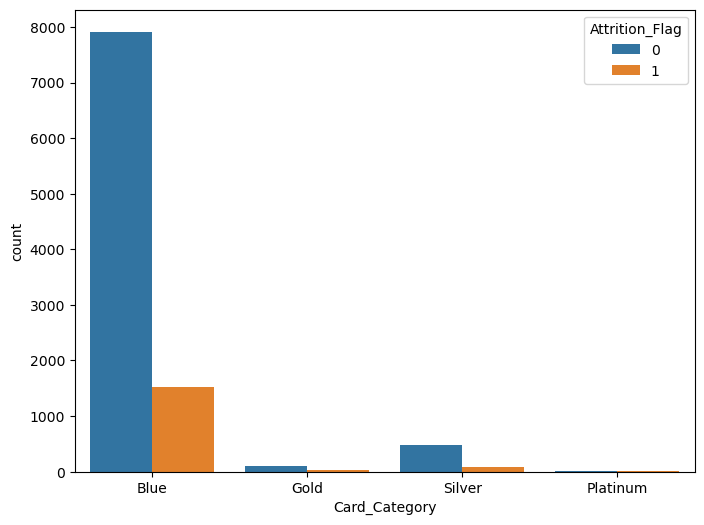

In [22]:
for col in categorical_columns:
    fix,ax=plt.subplots(figsize=(8,6))
    ax=sns.countplot(data=data,x=col,hue = 'Attrition_Flag')
    plt.show()

b) Missing values imputation

In [23]:
#Check what categorical variables has missing values
data[categorical_columns].isnull().sum()

Gender                0
Education_Level    1519
Marital_Status      749
Income_Category       2
Card_Category         0
dtype: int64

<Axes: >

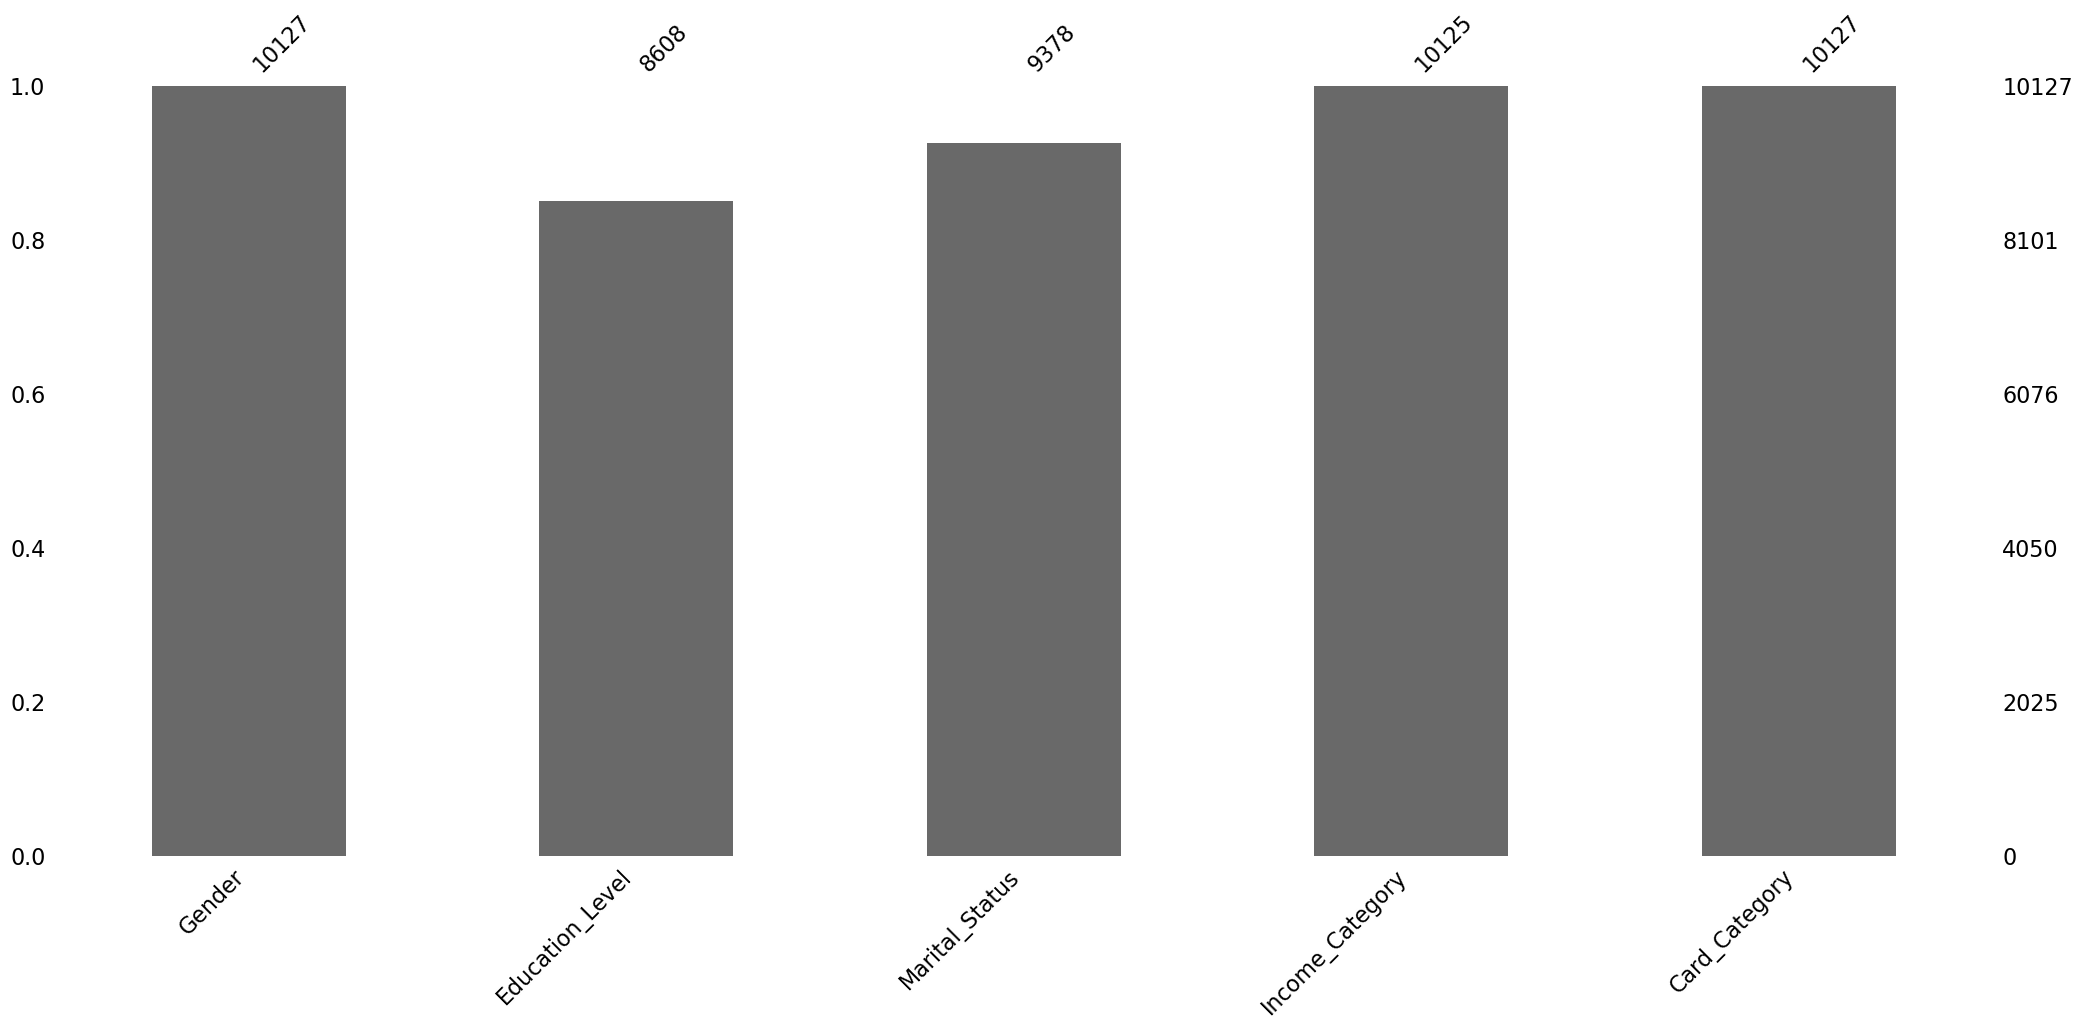

In [24]:
#Visualize missing values
msno.bar(data[categorical_columns])

In [25]:
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [26]:
data['Education_Level']=data['Education_Level'].fillna('Unknown')

In [27]:
data['Marital_Status'].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [28]:
data['Marital_Status']=data['Marital_Status'].fillna('Unknown')

In [29]:
data['Income_Category'].value_counts()

Less than $40K    3560
$40K - $60K       1789
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

We will atribute the unknown values to the abc category which is defined as an unknown source of income already.

In [30]:
data['Income_Category']=data['Income_Category'].fillna('abc')

In [31]:
data[categorical_columns].isnull().sum()

Gender             0
Education_Level    0
Marital_Status     0
Income_Category    0
Card_Category      0
dtype: int64

c)Feature variance

We will look at columns which have only one value

In [32]:
data[categorical_columns].nunique()

Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

We do not have any variables that have only one value so we do not have to delete any of them.

In [33]:
data['Education_Level'].value_counts()/len(data)*100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64

In [34]:
values1=data['Education_Level'].value_counts()/len(data)*100

In [35]:
data['Education_Level']=np.where(data['Education_Level'].isin(values1.index[4:]),'Other Education',data['Education_Level'])

In [36]:
data['Education_Level'].value_counts()/len(data)*100

Graduate           30.887726
High School        19.877555
Other Education    19.551693
Unknown            14.999506
Uneducated         14.683519
Name: Education_Level, dtype: float64

In [37]:
data['Marital_Status'].value_counts()/len(data)*100

Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64

In [38]:
values2=data['Marital_Status'].value_counts()/len(data)*100

In [39]:
data['Marital_Status']=np.where(data['Marital_Status'].isin(values2.index[2:]),'Other Status',data['Marital_Status'])

In [40]:
data['Marital_Status'].value_counts()/len(data)*100

Married         46.282216
Single          38.935519
Other Status    14.782265
Name: Marital_Status, dtype: float64

In [41]:
data['Income_Category'].value_counts()/len(data)*100

Less than $40K    35.153550
$40K - $60K       17.665646
$80K - $120K      15.157500
$60K - $80K       13.844179
abc               11.000296
$120K +            7.178829
Name: Income_Category, dtype: float64

### 3.2 Numerical variables

a)Explore categorical variables

In [42]:
numerical_columns=[col for col in data.columns if data[col].dtypes!='object'and col!='Attrition_Flag']

In [43]:
print("There are",len(numerical_columns),'numerical columns. These are',numerical_columns)

There are 15 numerical columns. These are ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Used_Bal', 'Total_Unused_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


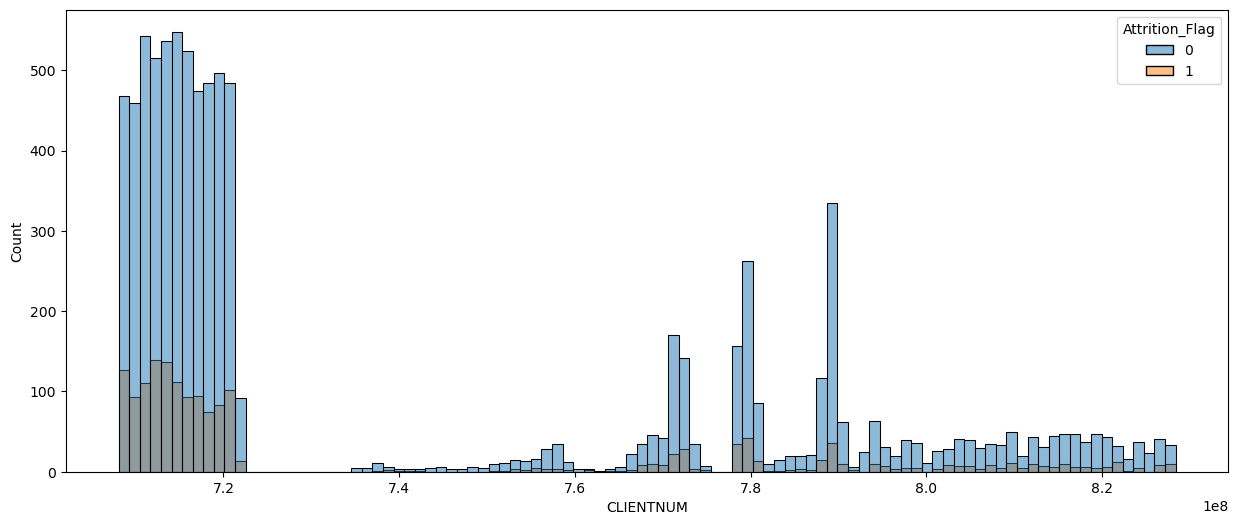

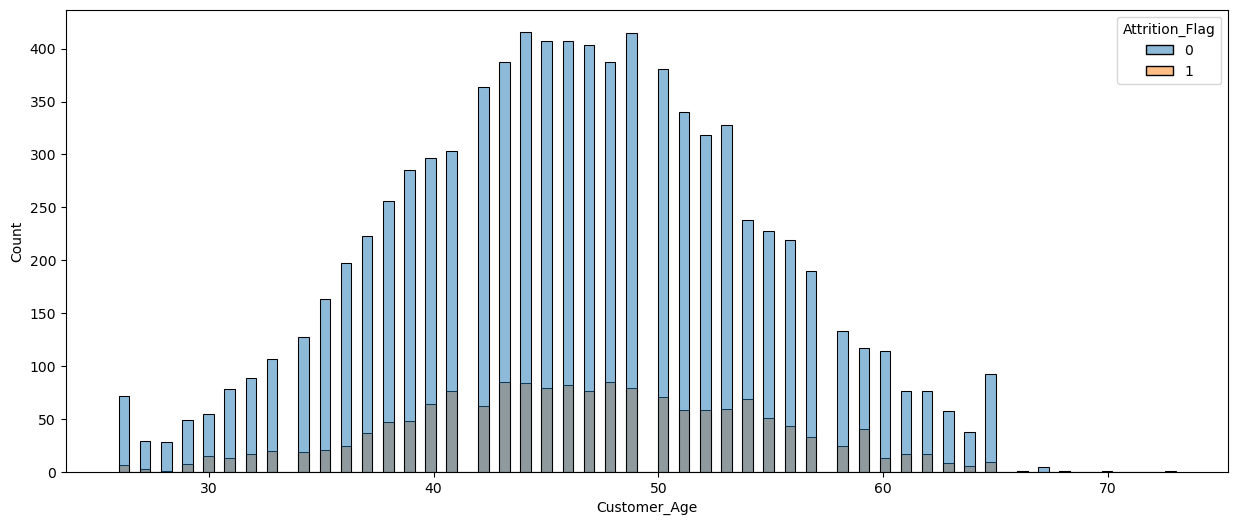

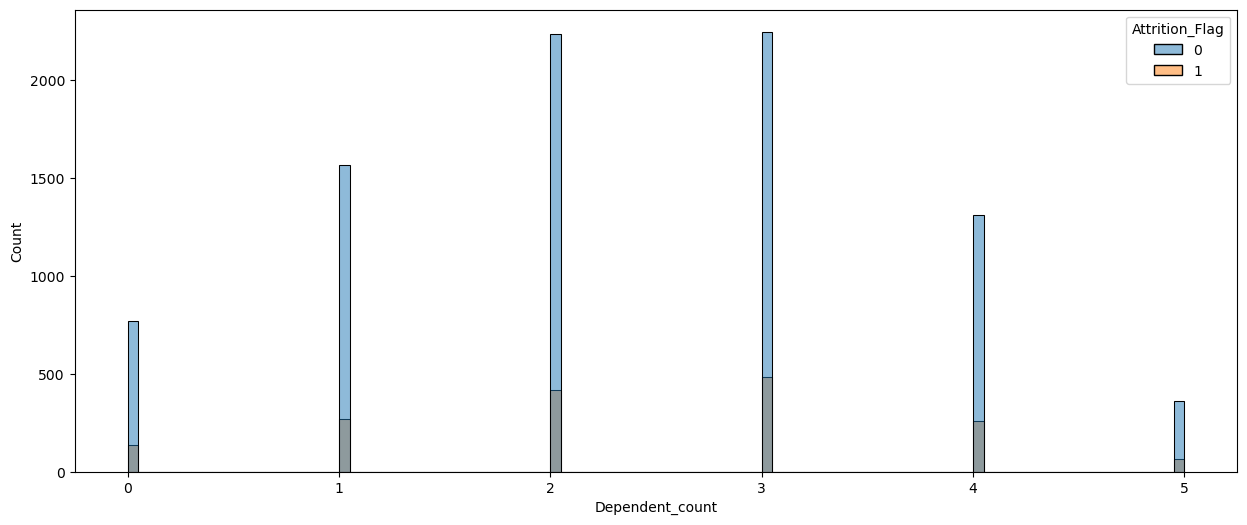

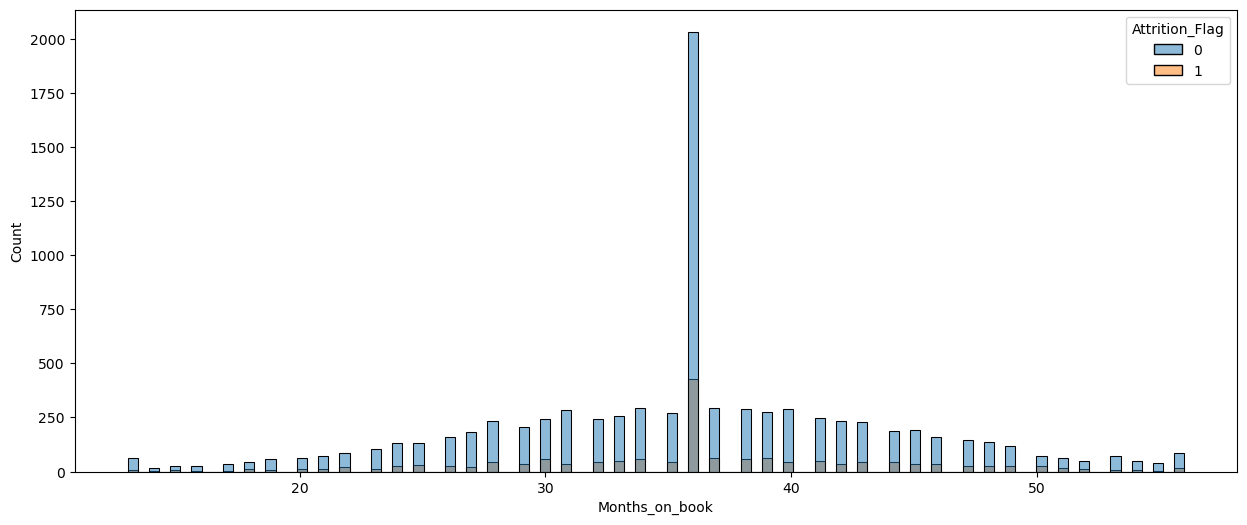

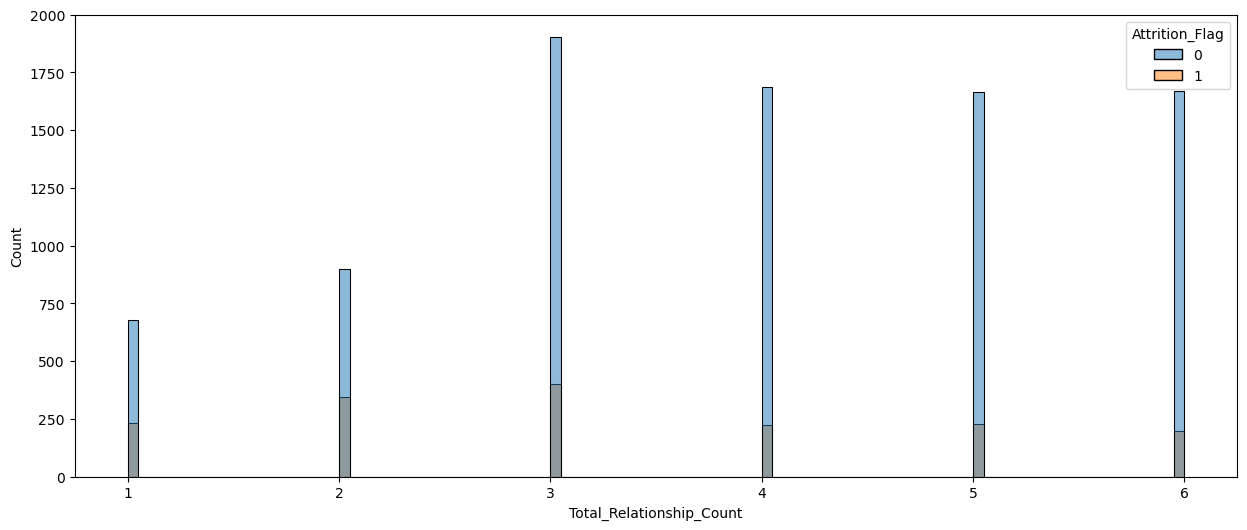

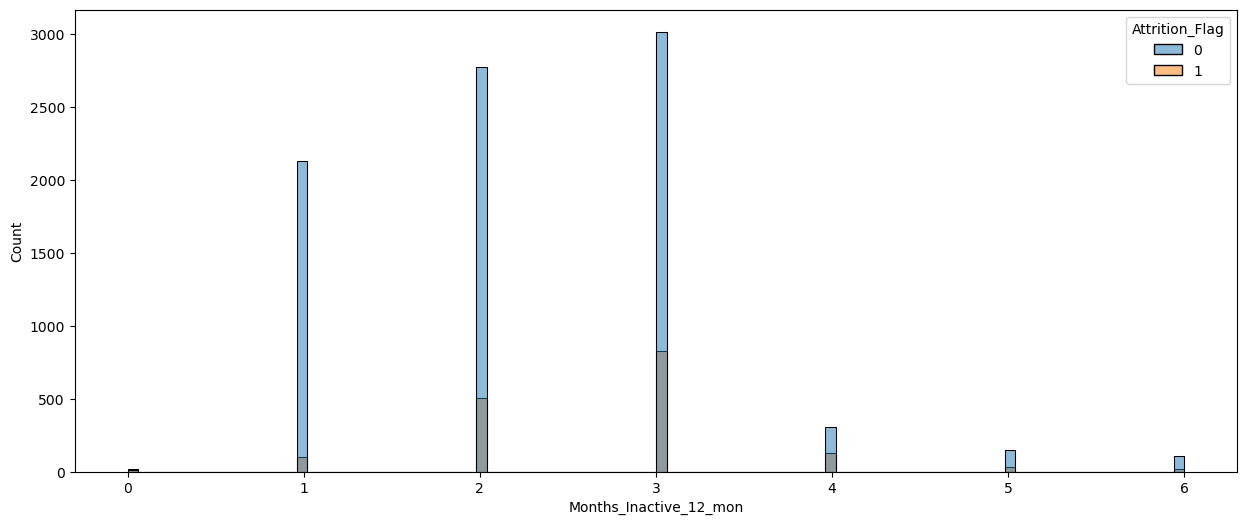

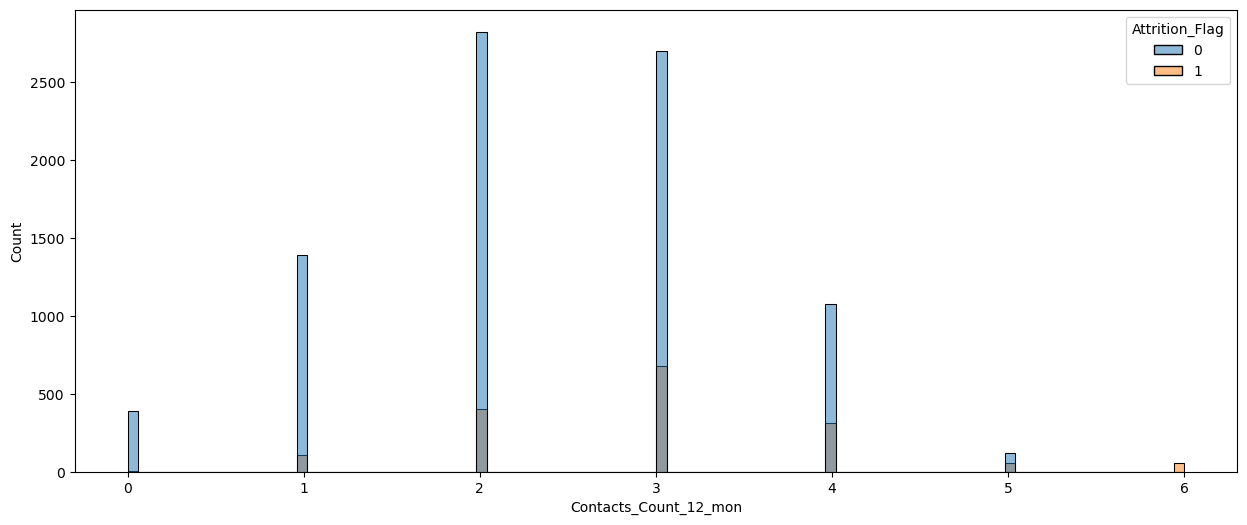

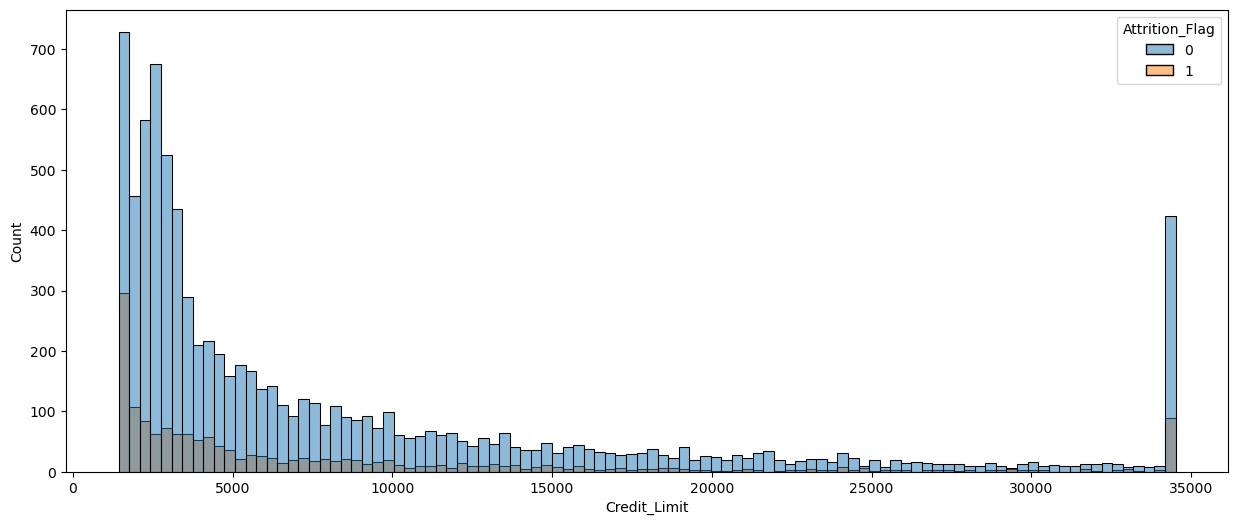

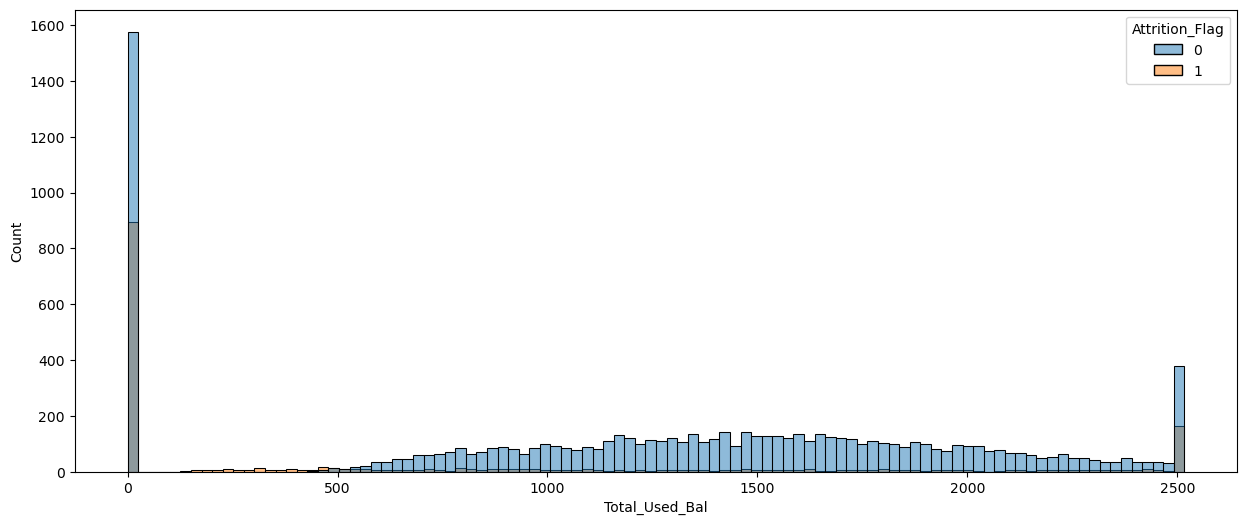

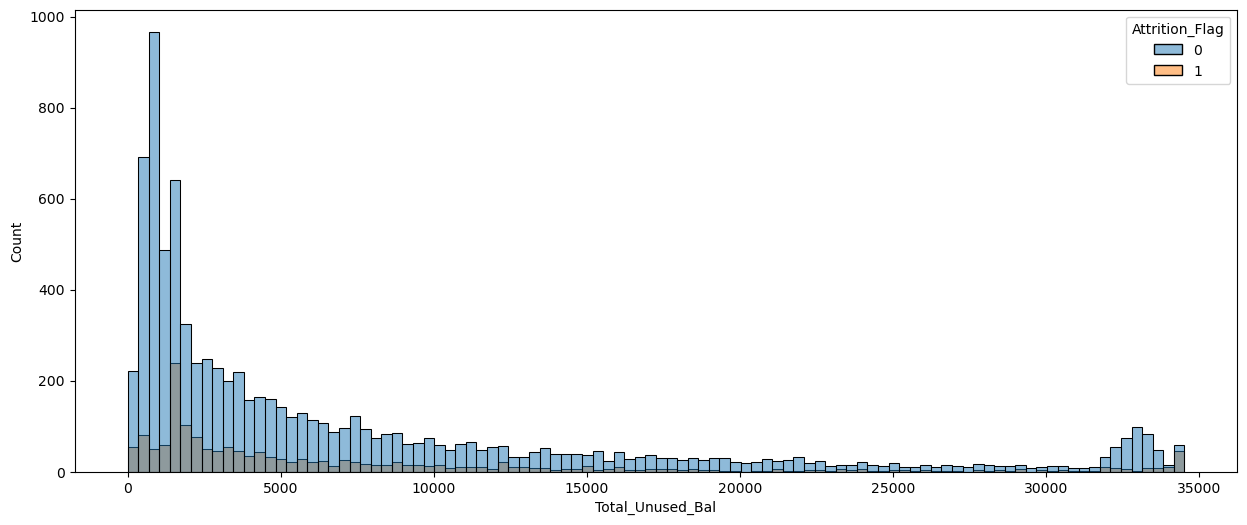

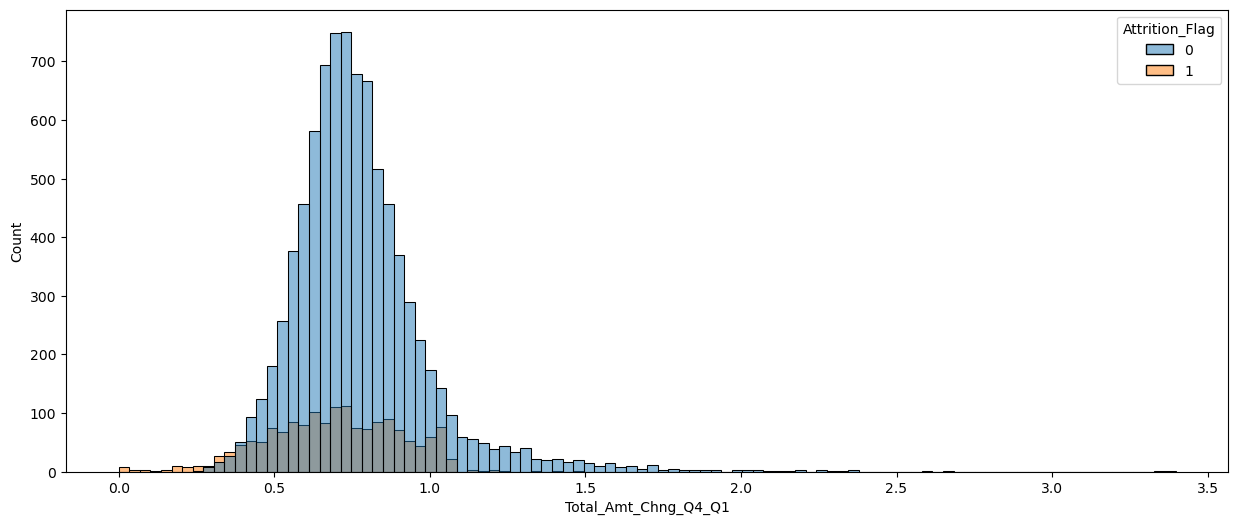

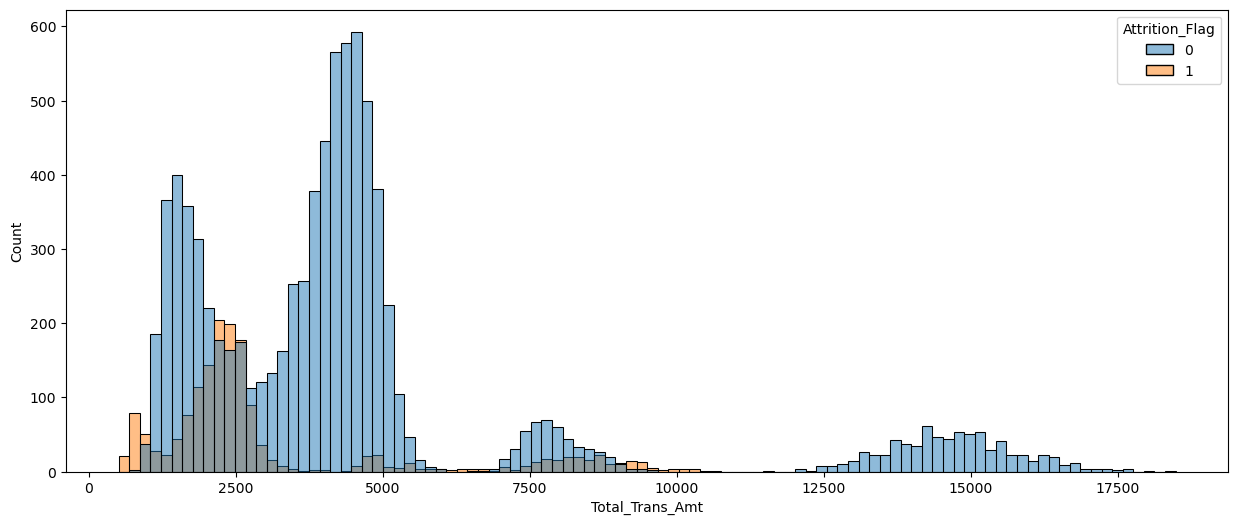

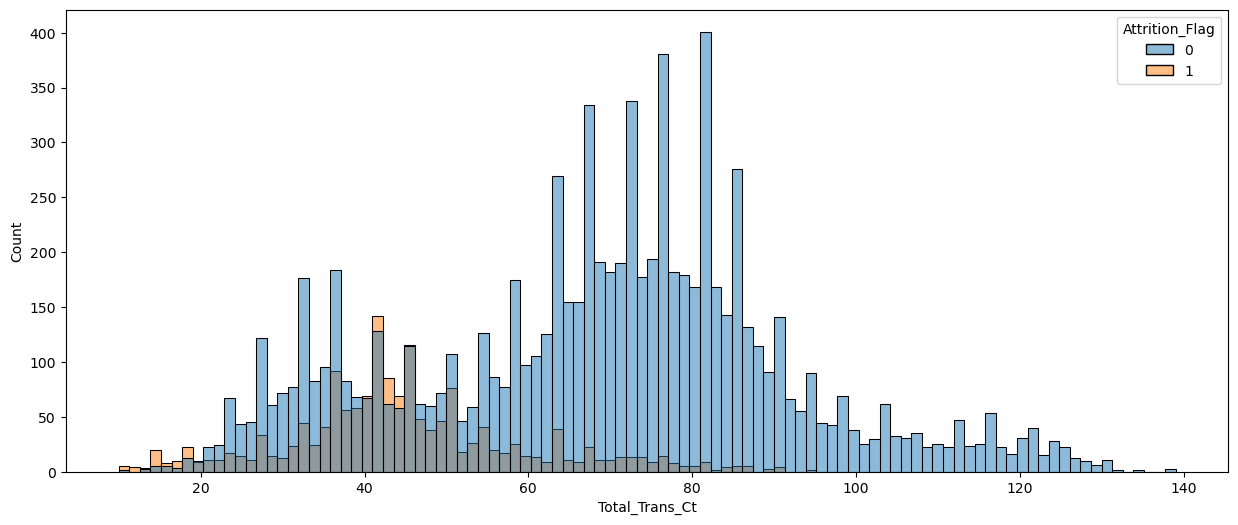

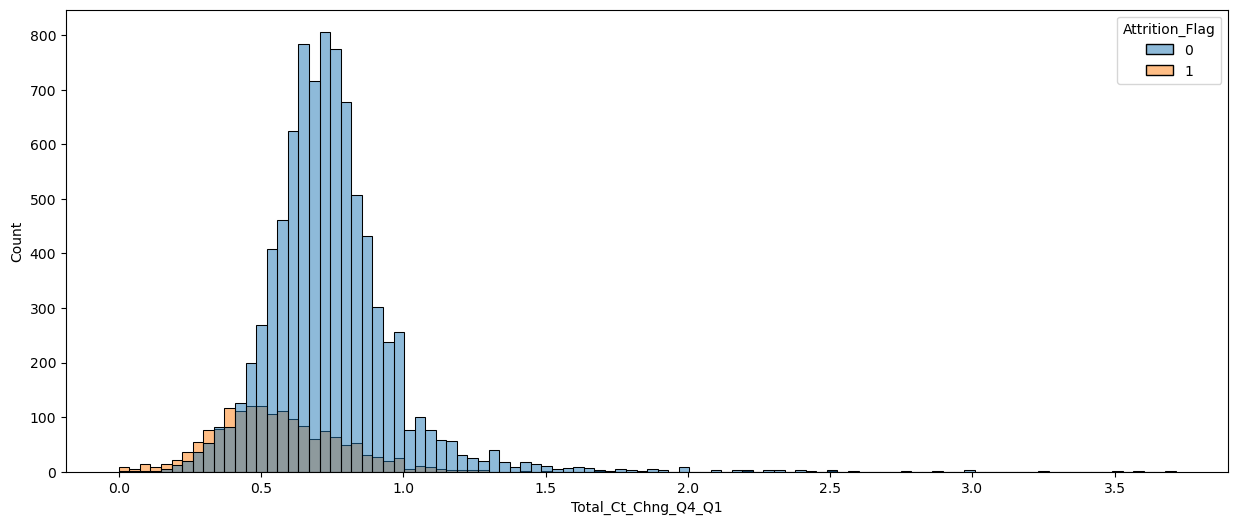

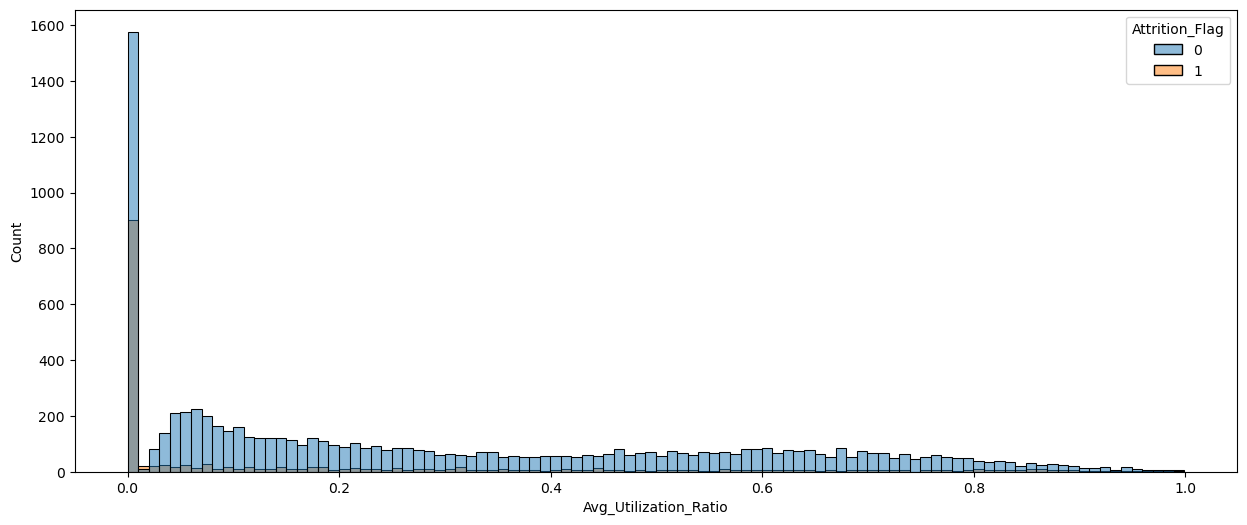

In [44]:
#graphics
for col in numerical_columns:
    fix,ax=plt.subplots(figsize=(15,6))
    sns.histplot(data=data,x=col,hue='Attrition_Flag',bins=100)
    plt.show()

b) Missing values imputation

In [45]:
data[numerical_columns].isnull().sum()

CLIENTNUM                   0
Customer_Age                3
Dependent_count             5
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Used_Bal              0
Total_Unused_Bal            0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<Axes: >

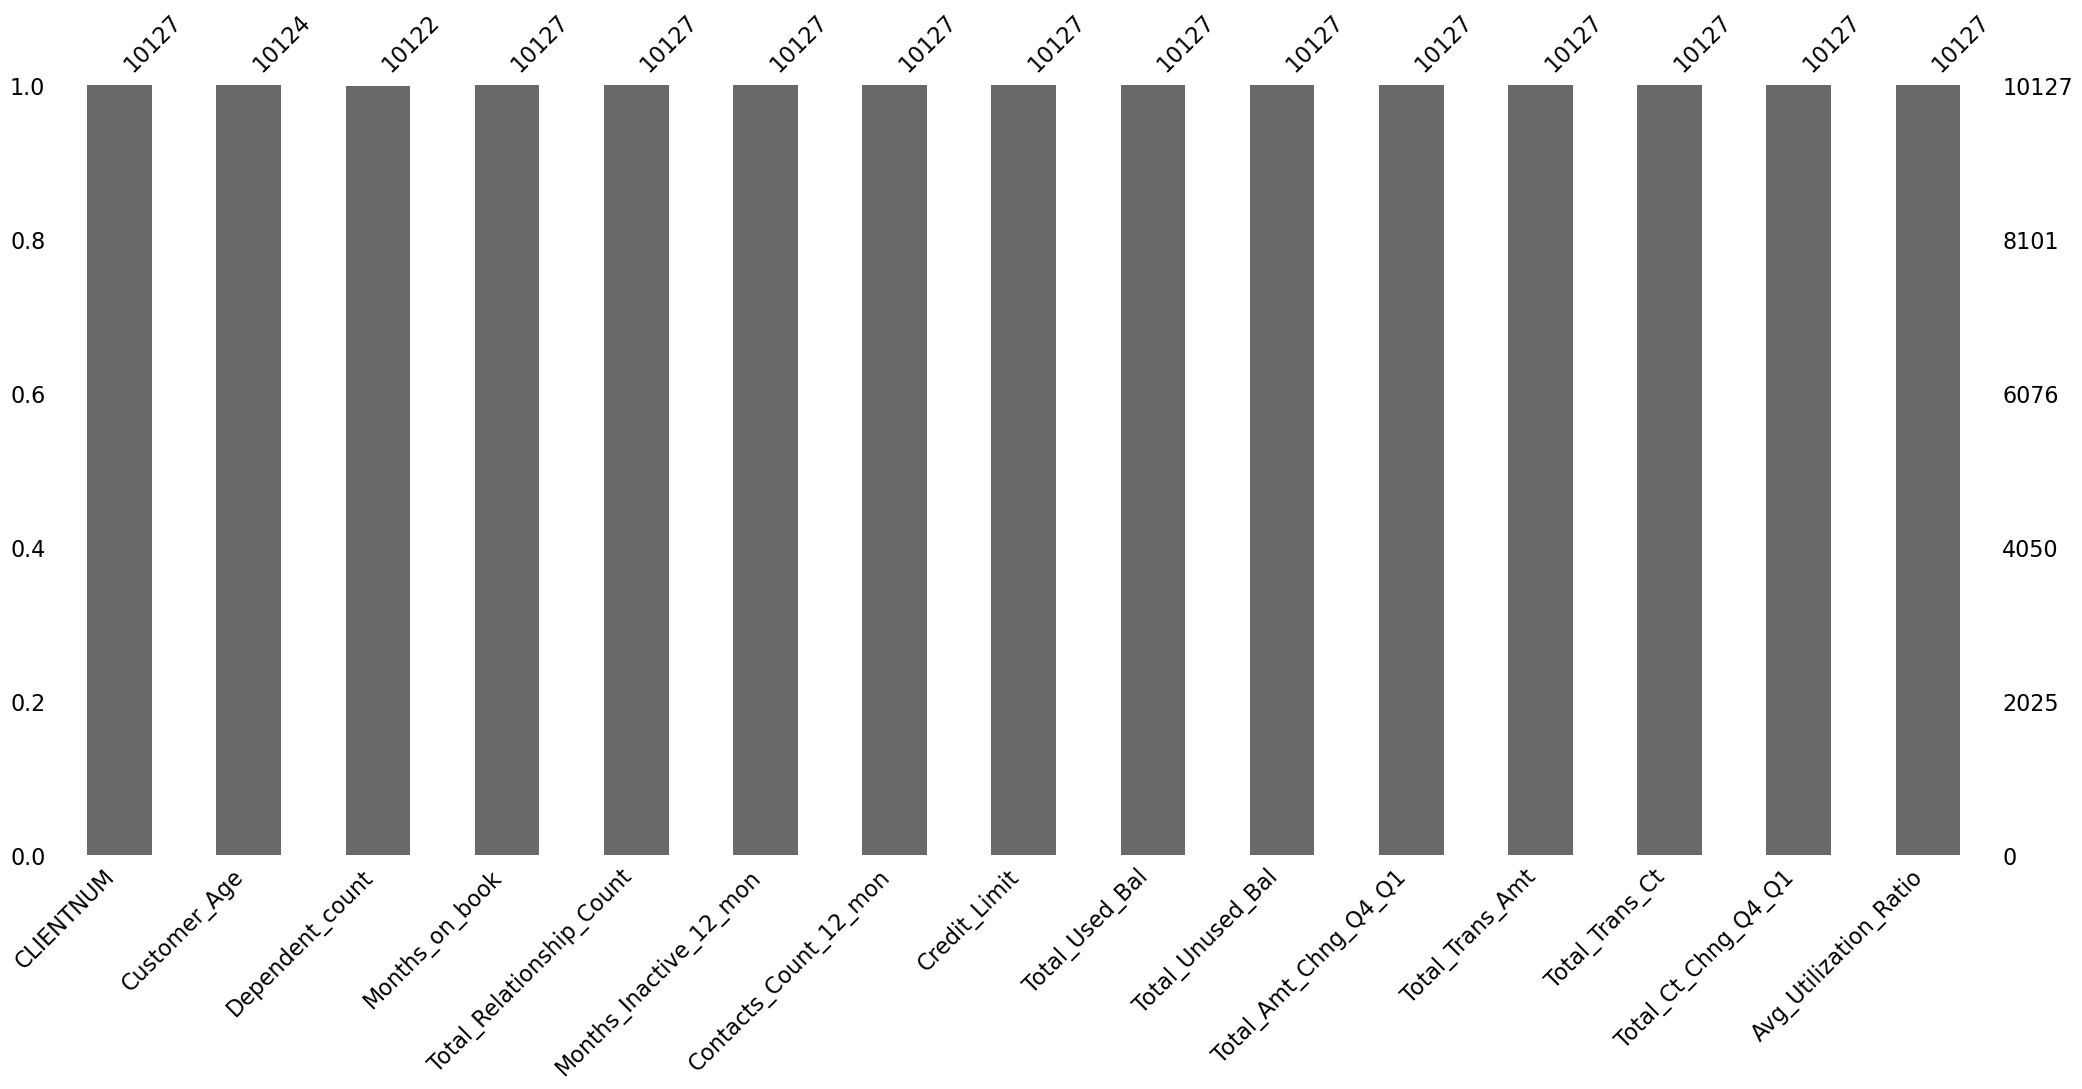

In [46]:
msno.bar(data[numerical_columns])

In [47]:
data['Customer_Age']

0        45.0
1        49.0
2        51.0
3        40.0
4        40.0
         ... 
10122    50.0
10123    41.0
10124    44.0
10125    30.0
10126    43.0
Name: Customer_Age, Length: 10127, dtype: float64

In [48]:
data['Customer_Age']=data['Customer_Age'].fillna(data['Customer_Age'].mean())

In [49]:
data['Customer_Age'].isnull().sum()

0

In [50]:
data['Dependent_count']

0        3.0
1        5.0
2        3.0
3        4.0
4        3.0
        ... 
10122    2.0
10123    2.0
10124    1.0
10125    2.0
10126    2.0
Name: Dependent_count, Length: 10127, dtype: float64

In [51]:
data['Dependent_count']=data['Dependent_count'].fillna(round(data['Dependent_count'].mean(),0))

In [52]:
data['Dependent_count'].isnull().sum()

0

c)Feature variance

In [53]:
#Constant variables

In [54]:
data[numerical_columns].nunique()

CLIENTNUM                   10127
Customer_Age                   46
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Used_Bal               1974
Total_Unused_Bal             6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

We do not have any unique columns so we do not have to remove any of them.

d)Outliers detection

In [55]:
q1=data['Credit_Limit'].quantile(0.25)
q3=data['Credit_Limit'].quantile(0.75)
IQR=q3-q1
lower_limit=q1-3*IQR
upper_limit=q3+3*IQR

In [56]:
data[(data['Credit_Limit']<lower_limit) | (data['Credit_Limit']>upper_limit) ]['Credit_Limit']

Series([], Name: Credit_Limit, dtype: float64)

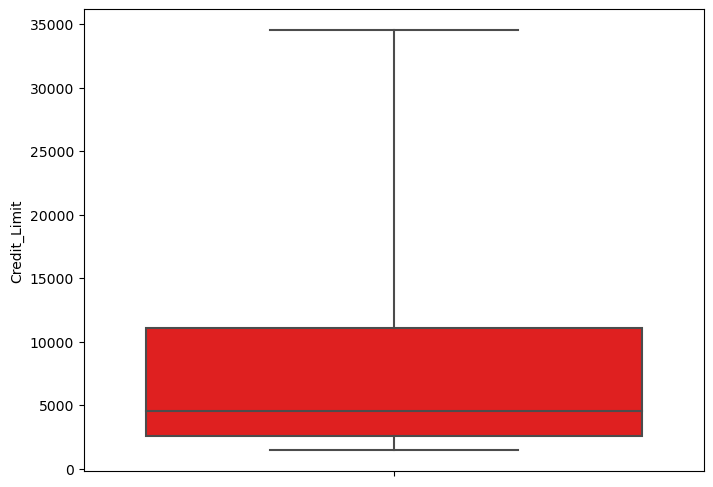

In [57]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(y=data['Credit_Limit'],color='red',whis=3)
plt.show()

Check for each column if it has outliers

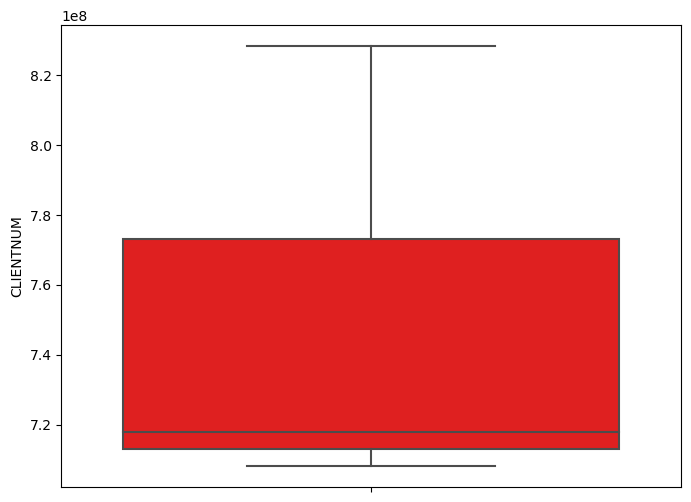

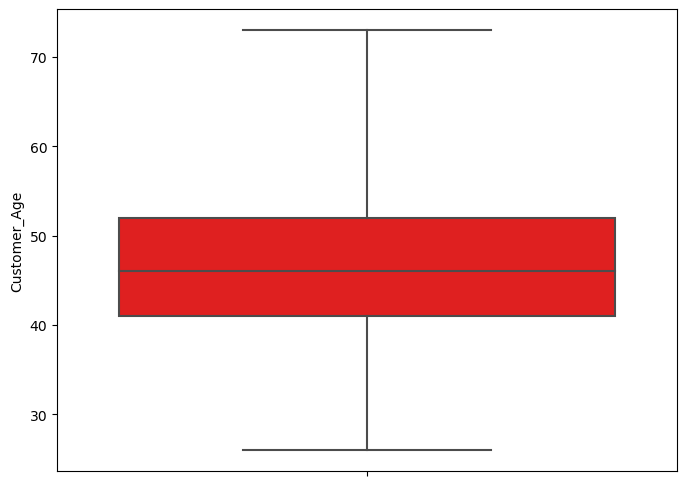

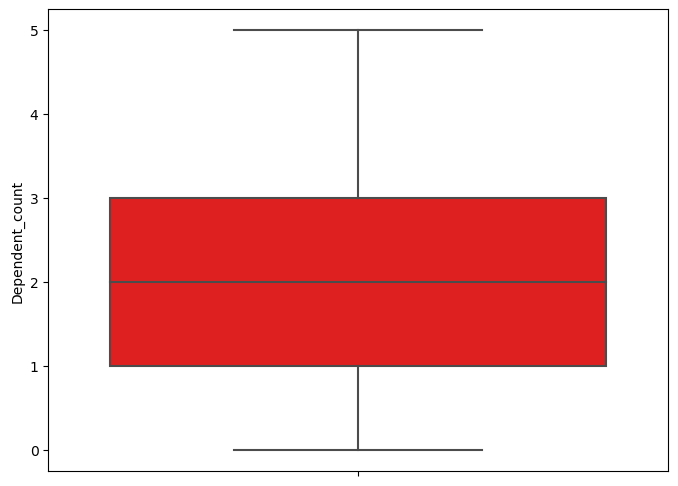

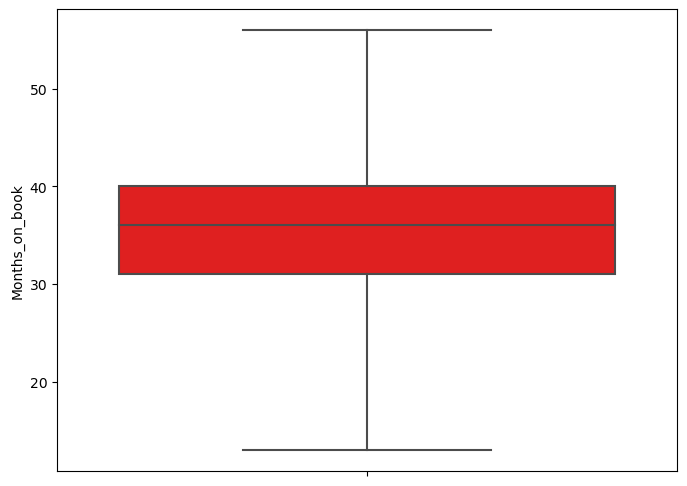

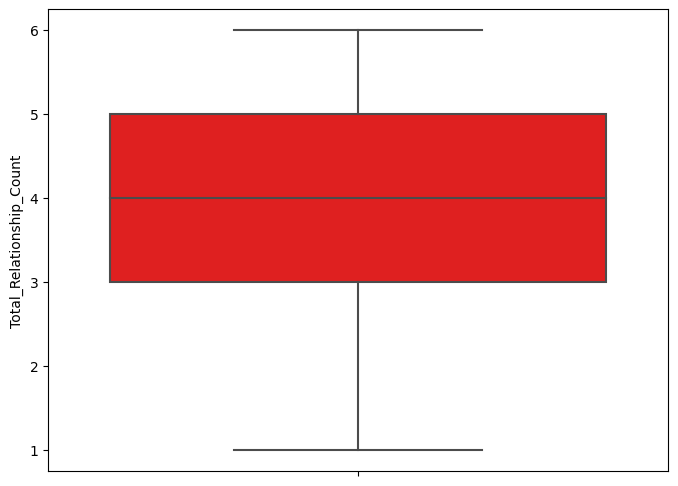

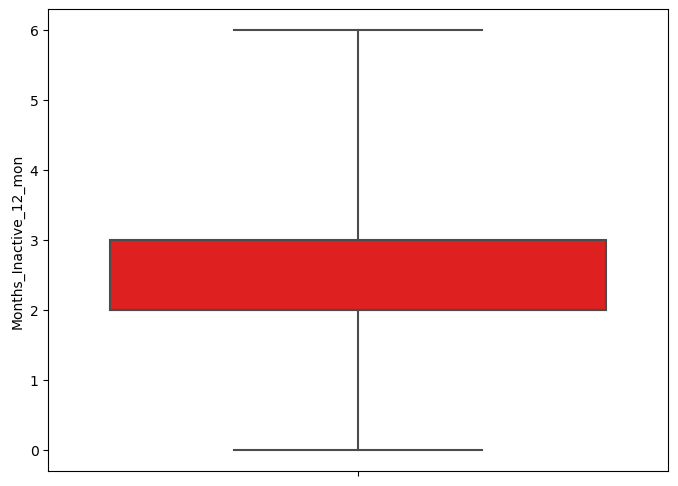

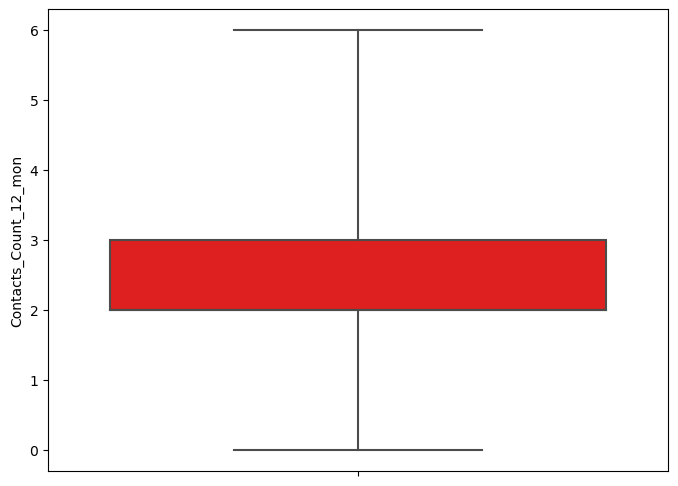

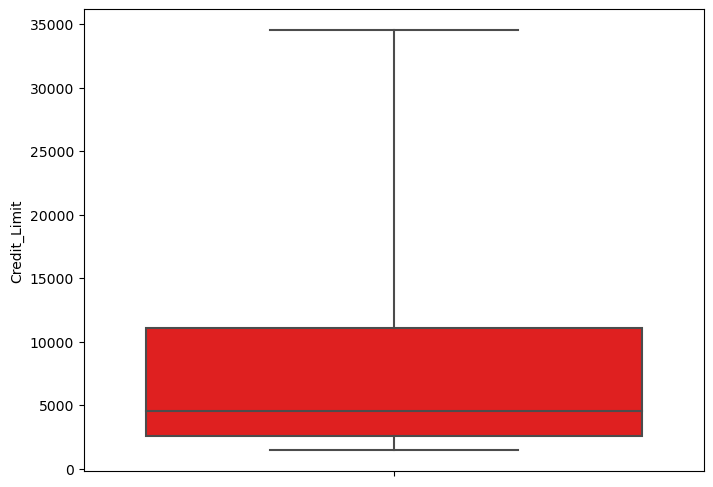

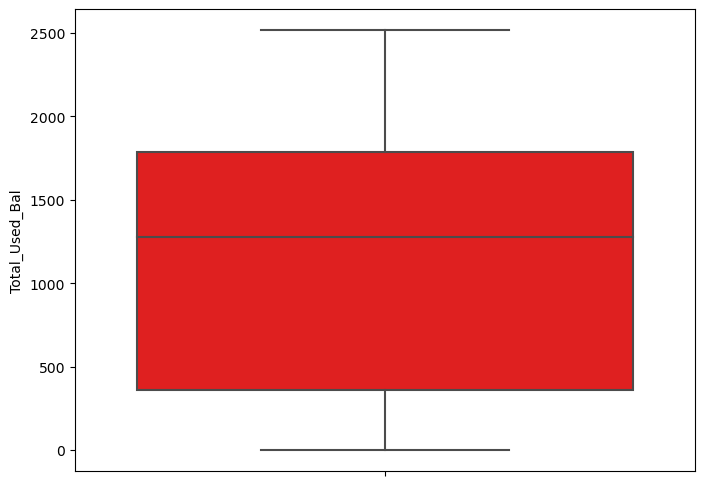

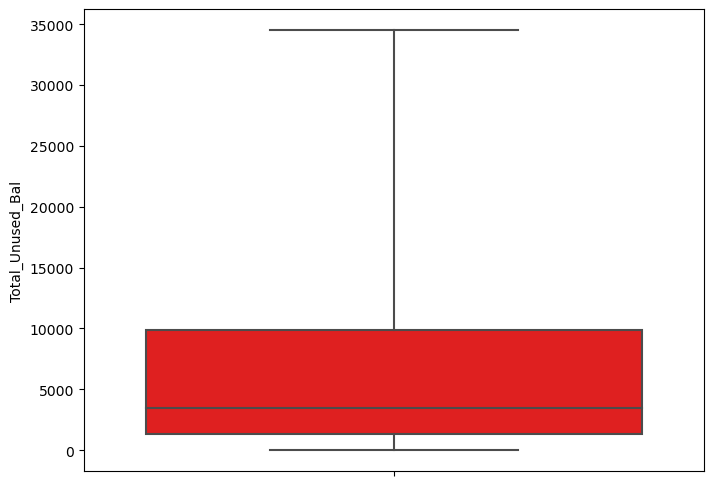

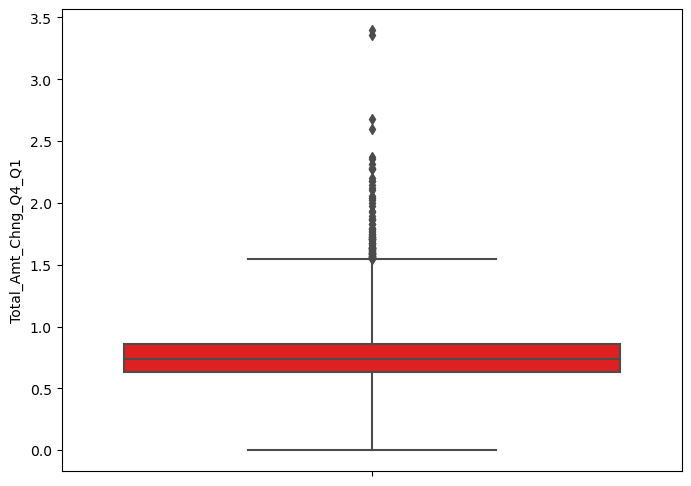

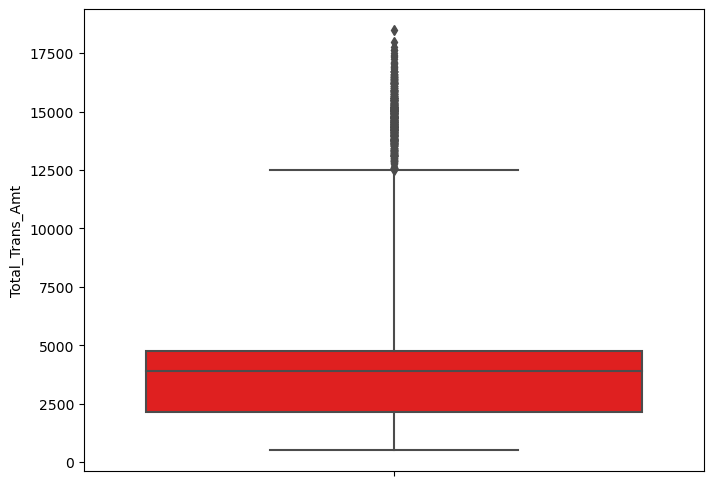

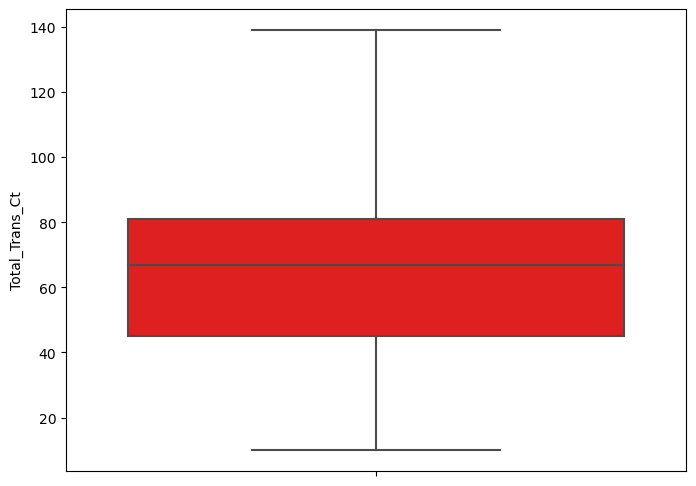

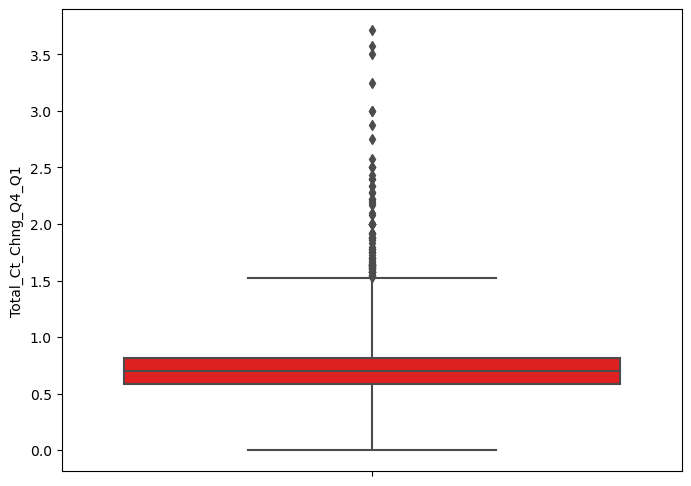

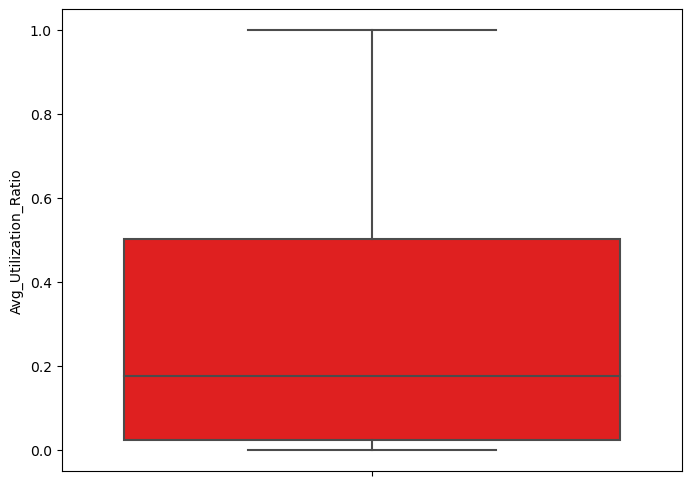

In [58]:
for col in numerical_columns:
    fig,ax = plt.subplots(figsize=(8,6))
    sns.boxplot(y=data[col],color='red',whis=3)
    plt.show()

We do not have any heavily affected variables by the outliers.

e)Correlation

In [59]:
correlation = data[numerical_columns].corr()

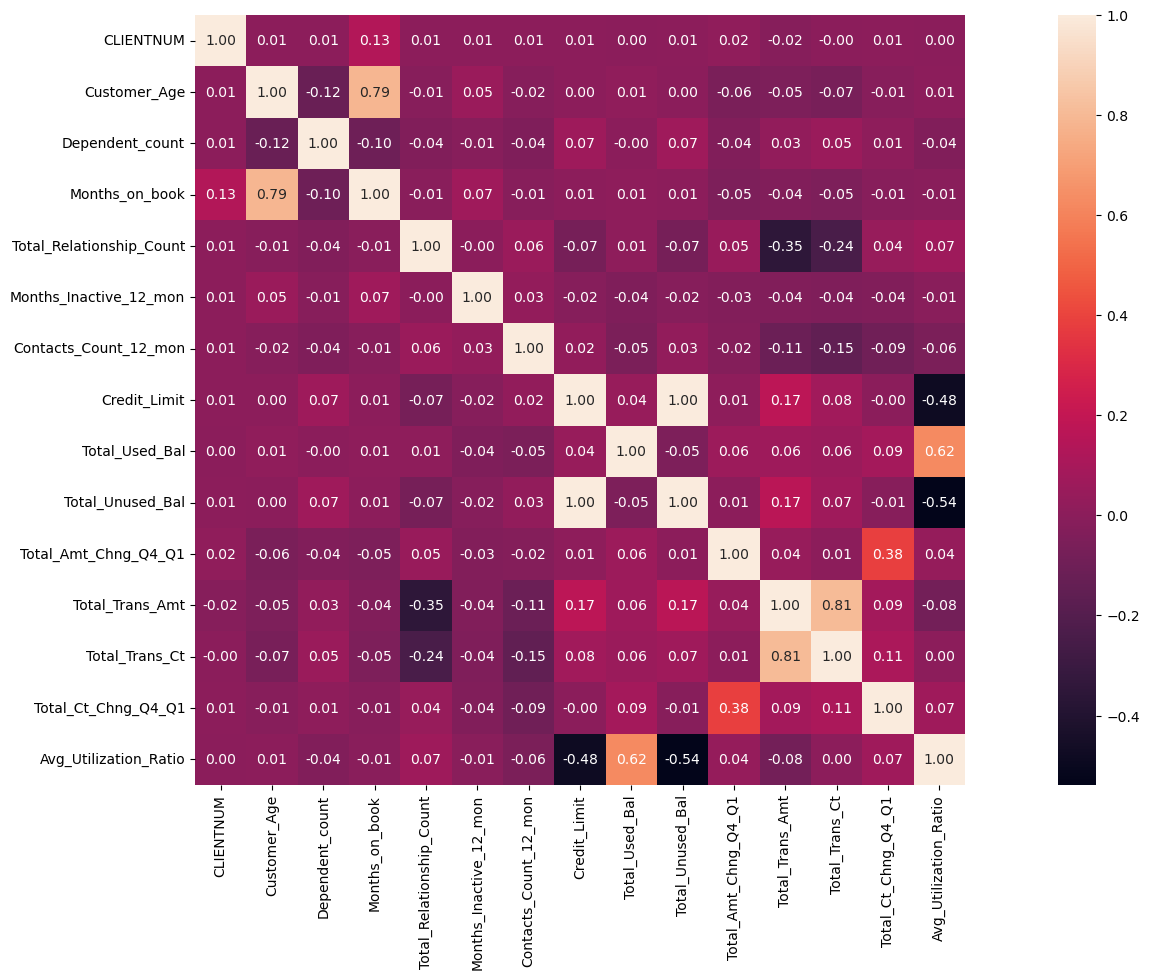

In [60]:
fig,ax=plt.subplots(figsize=(24,10))
sns.heatmap(correlation,annot=True,square=True,fmt='.2f')
plt.show()

In [61]:
columns_to_drop=['Total_Unused_Bal']
numerical_columns.remove('Total_Unused_Bal')

# E. Final dataset

In [62]:
print(columns_to_drop)

['Total_Unused_Bal']


In [63]:
data=data.drop(columns=columns_to_drop)

In [64]:
#Save the dataset
data.to_csv('C:\\Users\\rares\\Desktop\\TTJ project\\dataset\\transformed_dataset.csv')

# Model Development

## A. Viewing the new Dataset

In [65]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,818770008,0,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,713982108,0,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,769911858,0,40.0,F,4.0,High School,Other Status,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,709106358,0,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


## B. Classification

## 1. Declare independent variables and target variable

In [66]:
#indepent variables
X=data.drop(columns=['Attrition_Flag'])

#target variable
y=data['Attrition_Flag']

In [67]:
#Checking if both parameters of the shapes are identical
X.shape,y.shape 

((10127, 19), (10127,))

In [68]:
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,818770008,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,713982108,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,769911858,40.0,F,4.0,High School,Other Status,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,709106358,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


## 2. Perform data preprocessing

Categorical encoding

In [69]:
categorical_columns

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [70]:
X=pd.get_dummies(X,columns=categorical_columns)

In [71]:
X.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,45.0,3.0,39,5,1,3,12691.0,777,1.335,...,0,0,1,0,0,0,1,0,0,0
1,818770008,49.0,5.0,44,6,1,2,8256.0,864,1.541,...,0,0,0,0,1,0,1,0,0,0
2,713982108,51.0,3.0,36,4,1,0,3418.0,0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,769911858,40.0,4.0,34,3,4,1,3313.0,2517,1.405,...,0,0,0,0,1,0,1,0,0,0
4,709106358,40.0,3.0,21,5,1,0,4716.0,0,2.175,...,0,0,1,0,0,0,1,0,0,0


## 3. Split train and test sets

In [72]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [73]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8101, 34), (2026, 34), (8101,), (2026,))

## 4.Random Forest

In [74]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


## 4.1 Train algorithm

In [75]:
#Instantiate algorithm
rf=RandomForestClassifier(n_estimators=300,max_depth=5,n_jobs=-1,random_state=123)

In [76]:
#Train algorithm
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, n_jobs=-1,
                       random_state=123)

## 4.2 Predict results

In [77]:
y_predict=rf.predict(X_test)

In [78]:
y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## 4.3 Performance metrics

a) Accuracy score

In [79]:
accuracy=accuracy_score(y_test,y_predict)

In [80]:
print("Accuracy score for Random Forest Classifier is: ",accuracy)

Accuracy score for Random Forest Classifier is:  0.918558736426456


b)Confusion matrix

In [81]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[1695   10]
 [ 155  166]]


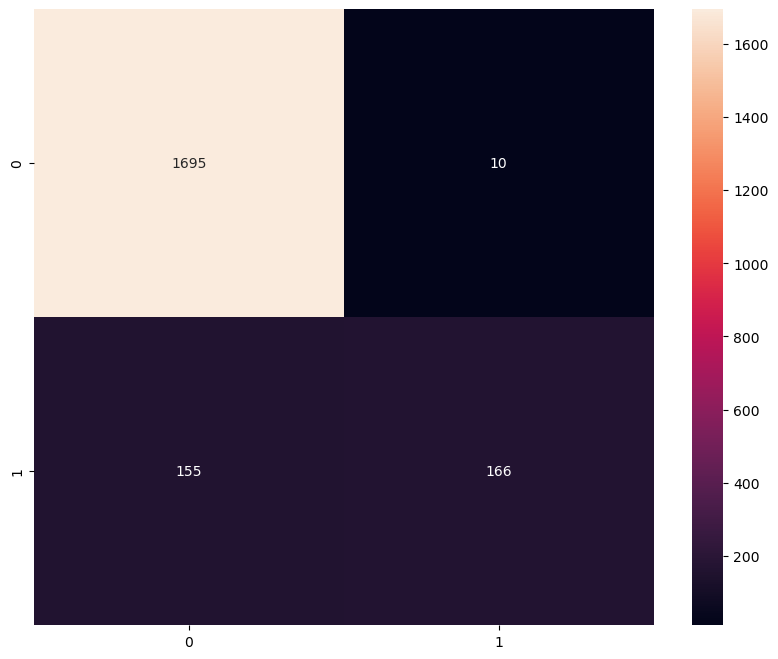

In [82]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

c)Precision and Recall

In [83]:
precision=precision_score(y_test,y_predict)
recall=recall_score(y_test,y_predict)
print("Precision score:",precision)
print("Recall score:",recall)

Precision score: 0.9431818181818182
Recall score: 0.5171339563862928


In [84]:
#Check for overfitting
y_train_predict=rf.predict(X_train)

In [85]:
precision=precision_score(y_train,y_train_predict)
recall=recall_score(y_train,y_train_predict)
print("Precision score:",precision)
print("Recall score:",recall)

Precision score: 0.9336099585062241
Recall score: 0.5168453292496171


d)AUC score

In [86]:
auc_score=roc_auc_score(y_test,y_predict)
print("AUC score is:",auc_score)

AUC score is: 0.7556344268734982


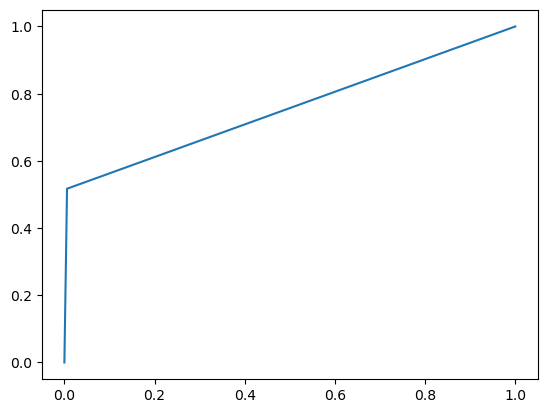

In [87]:
fpr,tpr,threshold=roc_curve(y_test,y_predict)
plt.plot(fpr,tpr)

# 5. XGBoost (eXtreme Gradient Boosting)

5.1 Train algorithm

In [88]:
xgb= XGBClassifier(n_estimators=200,max_depth=3,learning_rate=0.1,n_jobs=-1,random_state=10)

In [89]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

## 5.2 Predict results

In [90]:
y_predict=xgb.predict(X_test)

## 5.3 Performance metrics

a) Accuracy score

In [91]:
accuracy=accuracy_score(y_test,y_predict)
print("Accuracy for XGB is",accuracy)

Accuracy for XGB is 0.9649555774925962


b) Confusion matrix

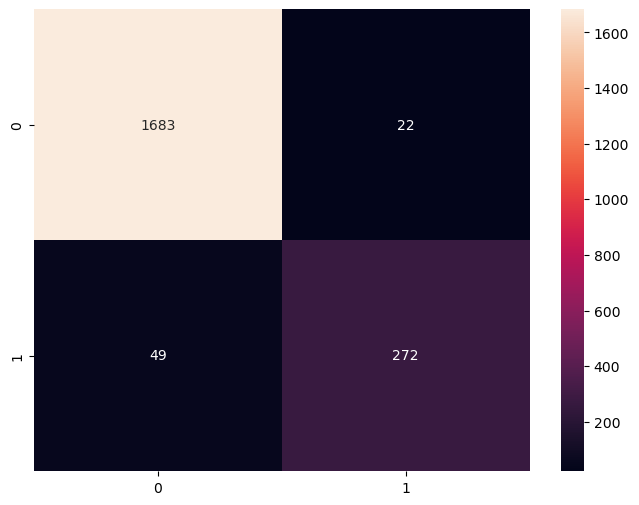

In [92]:
cm=confusion_matrix(y_test,y_predict)
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

c)Precision and Recall

In [93]:
precision=precision_score(y_test,y_predict)
recall=recall_score(y_test,y_predict)
print('Precision',precision)
print('Recall',recall)

Precision 0.9251700680272109
Recall 0.8473520249221184


d)AUC Score

In [94]:
auc_score=roc_auc_score(y_test,y_predict)
print("AUC score is:",auc_score)

AUC score is: 0.9172243995578333


e) Check for overfitting/ underfitting 

In [95]:
y_predict_train=xgb.predict(X_train)
y_predict_test=xgb.predict(X_test)
auc_score_train=roc_auc_score(y_train,y_predict_train)
auc_score_test=roc_auc_score(y_test,y_predict_test)
print('AUC train', auc_score_train)
print('AUC test',auc_score_test)

AUC train 0.967047317694864
AUC test 0.9172243995578333


Small difference, we do not have overfitting which is good.

## 6. Hyperparameters tuning

a) Declare possible values for hyperparameters of XGBoost

In [96]:
n_estimators=[200,300]
max_depth=[3,4]
learning_rate=[0.1,0.05]

b)Find the best hyperparameters

In [97]:
results=[]
for est in n_estimators:
    for md in max_depth:
        for lr in learning_rate:
            xgb=XGBClassifier(n_estimators=est,max_depth=md,learning_rate=lr,n_jobs=-1,random_state=10,subsample=0.6,colsample_bytree=0.5)
            xgb.fit(X_train,y_train)
            y_predict=xgb.predict(X_test)
            auc_score=roc_auc_score(y_test,y_predict)
            results.append(['estimators',est,'max_depth',md,'learning_rate',lr,'auc',auc_score])

In [98]:
results

[['estimators',
  200,
  'max_depth',
  3,
  'learning_rate',
  0.1,
  'auc',
  0.9227770621499894],
 ['estimators',
  200,
  'max_depth',
  3,
  'learning_rate',
  0.05,
  'auc',
  0.9059363608956615],
 ['estimators',
  200,
  'max_depth',
  4,
  'learning_rate',
  0.1,
  'auc',
  0.9296854587478645],
 ['estimators',
  200,
  'max_depth',
  4,
  'learning_rate',
  0.05,
  'auc',
  0.9144023898922903],
 ['estimators',
  300,
  'max_depth',
  3,
  'learning_rate',
  0.1,
  'auc',
  0.9308584792757238],
 ['estimators',
  300,
  'max_depth',
  3,
  'learning_rate',
  0.05,
  'auc',
  0.9153735120271147],
 ['estimators',
  300,
  'max_depth',
  4,
  'learning_rate',
  0.1,
  'auc',
  0.9233635724139191],
 ['estimators',
  300,
  'max_depth',
  4,
  'learning_rate',
  0.05,
  'auc',
  0.9253058166835676]]

Model with parameters n_estimators=300,max_depth=3,learning_rate=0.1 is better.

In [99]:
#Chech for overfitting
best_model=XGBClassifier(n_estimators=300,max_depth=3,learning_rate=0.1,n_jobs=-1,subsample=0.6,colsample_bytree=0.5,random_state=10)
best_model.fit(X_train,y_train)
y_predict_train=best_model.predict(X_train)
y_predict_test=best_model.predict(X_test)
auc_score_train=roc_auc_score(y_train,y_predict_train)
auc_score_test=roc_auc_score(y_test,y_predict_test)
print("AUC train",auc_score_train)
print("AUC test",auc_score_test) 

AUC train 0.9762207482981698
AUC test 0.9308584792757238


# 7. Save the model

In [100]:
with open('C:\\Users\\rares\\Desktop\\TTJ project\\final_model_v1.pkl','wb') as file:
          pickle.dump(best_model,file)

# Model Explainability

## 1. Predict

Predict likelihood of target varirable (propensity probabilities)

In [101]:
y_predict_proba=best_model.predict_proba(X_test)

In [102]:
y_predict_proba

array([[9.6998757e-01, 3.0012425e-02],
       [9.9582106e-01, 4.1789645e-03],
       [9.9885541e-01, 1.1446070e-03],
       ...,
       [9.9933147e-03, 9.9000669e-01],
       [9.9976063e-01, 2.3937947e-04],
       [9.6547604e-01, 3.4523938e-02]], dtype=float32)

Out of the two probabilities, we are interested in probabilities of class 1

In [103]:
y_predict_proba_class_1=y_predict_proba[:,1]

In [104]:
y_predict_proba_class_1

array([3.0012425e-02, 4.1789645e-03, 1.1446070e-03, ..., 9.9000669e-01,
       2.3937947e-04, 3.4523938e-02], dtype=float32)

# 4.Performance metrics

## 4.1 AUC score for probabilities

In [105]:
auc_score=roc_auc_score(y_test,y_predict_proba_class_1)
print(auc_score)

0.9929527411589516


## 4.2 Lift and Gain analysis

In [106]:
#declare an empty DataFrame
lift_gain_report=pd.DataFrame()

# add y_test in DataFrame
lift_gain_report['y_test']=y_test

#### STEP 1 ####
# add predict probabilities for class 1 in DataFrame
lift_gain_report['Predicted Probabilities']=y_predict_proba_class_1

# order probabilities in ascending order
lift_gain_report['Probabilities Rank'] = lift_gain_report['Predicted Probabilities'].rank(method='first',ascending=True,pct=True)

#### STEP 2 ####
# calculate decile group
lift_gain_report['Decile group']=np.floor((1-lift_gain_report['Probabilities Rank'])*10)+1

#### STEP 3 ####
# group observations by decile
lift_gain_report['Number of observations']=1
lift_gain_report = lift_gain_report.groupby(['Decile group']).sum().reset_index()

# cumulative number of observations
lift_gain_report['Cumulative no. of observations']=lift_gain_report['Number of observations'].cumsum()

#cumulative percentage of observations
lift_gain_report['Cumulative % of no. of observations'] = lift_gain_report['Cumulative no. of observations']/lift_gain_report['Cumulative no. of observations'].max()

#### STEP 4 ####
# calculate number of positives cumulative
lift_gain_report['Cumulative no. of positives']=lift_gain_report['y_test'].cumsum()

#### STEP 5 ####
#calculate cumulative percentage of positives (Gain)
lift_gain_report['Gain']=lift_gain_report['Cumulative no. of positives']/lift_gain_report['Cumulative no. of positives'].max()

#### STEP 6 ####
#calculate Lift
lift_gain_report['Lift']=lift_gain_report['Gain']/lift_gain_report['Cumulative % of no. of observations']

#afisare
lift_gain_report

,Decile group,y_test,Predicted Probabilities,Probabilities Rank,Number of observations,Cumulative no. of observations,Cumulative % of no. of observations,Cumulative no. of positives,Gain,Lift
0,1.0,200,198.797394,192.880059,203,203,0.100197,200,0.623053,6.218253
1,2.0,110,100.008575,172.539980,203,406,0.200395,310,0.965732,4.819146
2,3.0,10,11.227006,151.500000,202,608,0.300099,320,0.996885,3.321856
3,4.0,1,2.514439,131.960020,203,811,0.400296,321,1.000000,2.498150
4,5.0,0,0.870416,111.119941,202,1013,0.500000,321,1.000000,2.000000
5,6.0,0,0.390630,91.380059,203,1216,0.600197,321,1.000000,1.666118
6,7.0,0,0.185018,71.039980,203,1419,0.700395,321,1.000000,1.427766
7,8.0,0,0.093732,50.500000,202,1621,0.800099,321,1.000000,1.249846
8,9.0,0,0.049250,30.460020,203,1824,0.900296,321,1.000000,1.110746
9,10.0,0,0.018808,10.119941,202,2026,1.000000,321,1.000000,1.000000


## 4.3 Lift and Gain charts

a)Lift chart

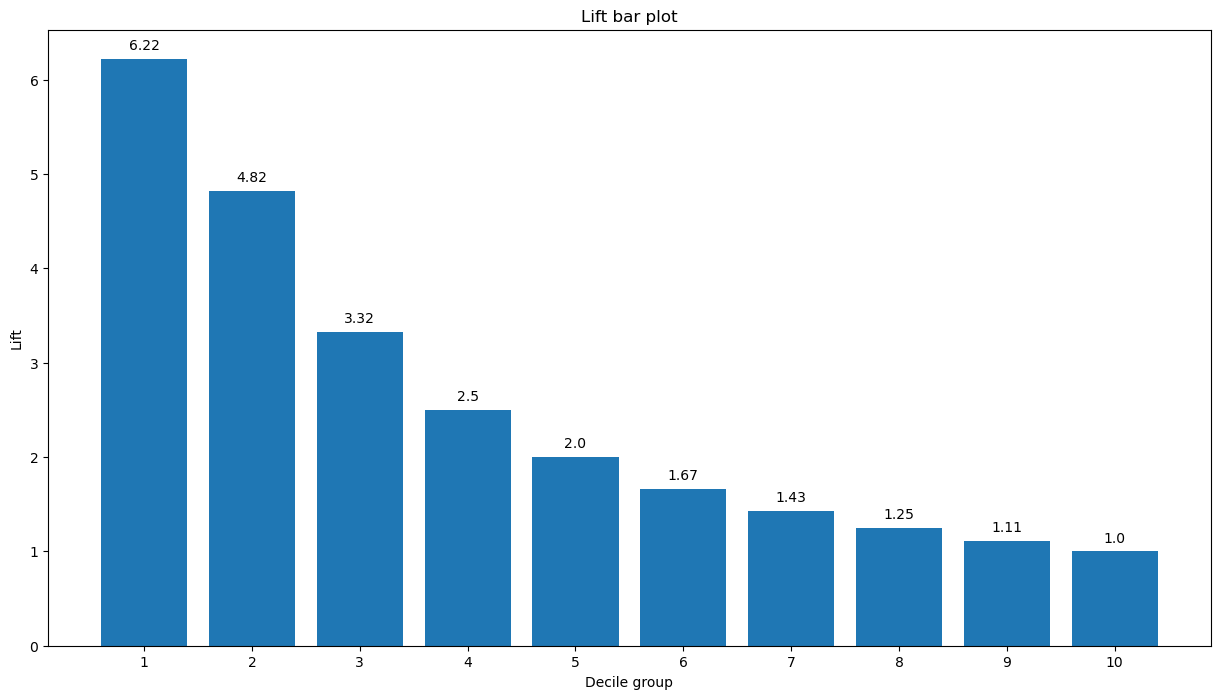

In [107]:
fig,ax=plt.subplots(figsize=(15,8))
barplot = plt.bar(lift_gain_report['Decile group'],lift_gain_report['Lift'])
plt.title('Lift bar plot')
plt.xlabel('Decile group')
plt.ylabel('Lift')
plt.xticks(lift_gain_report['Decile group'])

#add Text above bars in chart
for b in barplot:
    plt.text(b.get_x()+b.get_width()/2,b.get_height()+0.1,round(b.get_height(),2),ha='center')
    
plt.show()

b)Gain chart

In [108]:
lift_gain_report['Random Selection']=lift_gain_report['Decile group']/lift_gain_report['Decile group'].max()
lift_gain_report

,Decile group,y_test,Predicted Probabilities,Probabilities Rank,Number of observations,Cumulative no. of observations,Cumulative % of no. of observations,Cumulative no. of positives,Gain,Lift,Random Selection
0,1.0,200,198.797394,192.880059,203,203,0.100197,200,0.623053,6.218253,0.1
1,2.0,110,100.008575,172.539980,203,406,0.200395,310,0.965732,4.819146,0.2
2,3.0,10,11.227006,151.500000,202,608,0.300099,320,0.996885,3.321856,0.3
3,4.0,1,2.514439,131.960020,203,811,0.400296,321,1.000000,2.498150,0.4
4,5.0,0,0.870416,111.119941,202,1013,0.500000,321,1.000000,2.000000,0.5
5,6.0,0,0.390630,91.380059,203,1216,0.600197,321,1.000000,1.666118,0.6
6,7.0,0,0.185018,71.039980,203,1419,0.700395,321,1.000000,1.427766,0.7
7,8.0,0,0.093732,50.500000,202,1621,0.800099,321,1.000000,1.249846,0.8
8,9.0,0,0.049250,30.460020,203,1824,0.900296,321,1.000000,1.110746,0.9
9,10.0,0,0.018808,10.119941,202,2026,1.000000,321,1.000000,1.000000,1.0


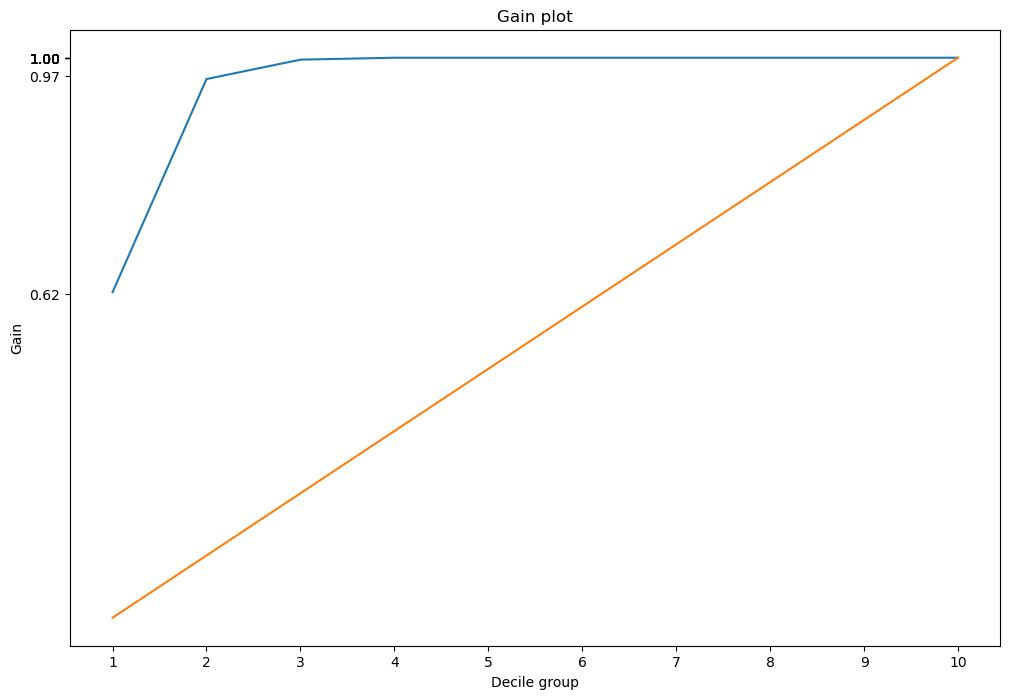

In [109]:
fig,ax=plt.subplots(figsize=(12,8))
sns.lineplot(data=lift_gain_report,x=lift_gain_report['Decile group'],y=lift_gain_report['Gain'])
sns.lineplot(data=lift_gain_report,x=lift_gain_report['Decile group'],y=lift_gain_report['Random Selection'])
plt.title('Gain plot')
plt.xticks(lift_gain_report['Decile group'])
plt.yticks(round(lift_gain_report['Gain'],2))
plt.show()

On the first decile we reach 62% and on the second one we reach 96%.

# 5. Feature importance

## 5.1 Feature importance analysis

In [110]:
feat_imp=best_model.get_booster().get_score(importance_type='total_gain')

In [111]:
feat_imp

{'CLIENTNUM': 167.08949279785156,
 'Customer_Age': 740.0399169921875,
 'Dependent_count': 70.99746704101562,
 'Months_on_book': 292.5928039550781,
 'Total_Relationship_Count': 1619.6885986328125,
 'Months_Inactive_12_mon': 559.3176879882812,
 'Contacts_Count_12_mon': 414.0946350097656,
 'Credit_Limit': 511.5290222167969,
 'Total_Used_Bal': 2246.921142578125,
 'Total_Amt_Chng_Q4_Q1': 1402.31689453125,
 'Total_Trans_Amt': 5334.1669921875,
 'Total_Trans_Ct': 5196.6259765625,
 'Total_Ct_Chng_Q4_Q1': 2228.74072265625,
 'Avg_Utilization_Ratio': 812.3931884765625,
 'Gender_F': 142.53350830078125,
 'Gender_M': 66.28714752197266,
 'Education_Level_Graduate': 5.692897319793701,
 'Education_Level_High School': 9.058282852172852,
 'Education_Level_Other Education': 22.979249954223633,
 'Education_Level_Uneducated': 18.712020874023438,
 'Education_Level_Unknown': 6.638480186462402,
 'Marital_Status_Married': 55.42837142944336,
 'Marital_Status_Other Status': 13.06330680847168,
 'Marital_Status_Sing

In [112]:
feature_importance=pd.DataFrame()
feature_importance['Variable']=feat_imp.keys()
feature_importance['Importance value']=feat_imp.values()
feature_importance['% Importance value'] = feature_importance['Importance value']/feature_importance['Importance value'].sum()*100
feature_importance.sort_values(by=['Importance value'],ascending=False)


,Variable,Importance value,% Importance value
10,Total_Trans_Amt,5334.166992,24.178509
11,Total_Trans_Ct,5196.625977,23.555069
8,Total_Used_Bal,2246.921143,10.184759
12,Total_Ct_Chng_Q4_Q1,2228.740723,10.102351
4,Total_Relationship_Count,1619.688599,7.341663
9,Total_Amt_Chng_Q4_Q1,1402.316895,6.356369
13,Avg_Utilization_Ratio,812.393188,3.682385
1,Customer_Age,740.039917,3.354425
5,Months_Inactive_12_mon,559.317688,2.535254
7,Credit_Limit,511.529022,2.318639


## 5.2 SHAP chart

In [113]:
explainer=shap.TreeExplainer(best_model)
shap_values=explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


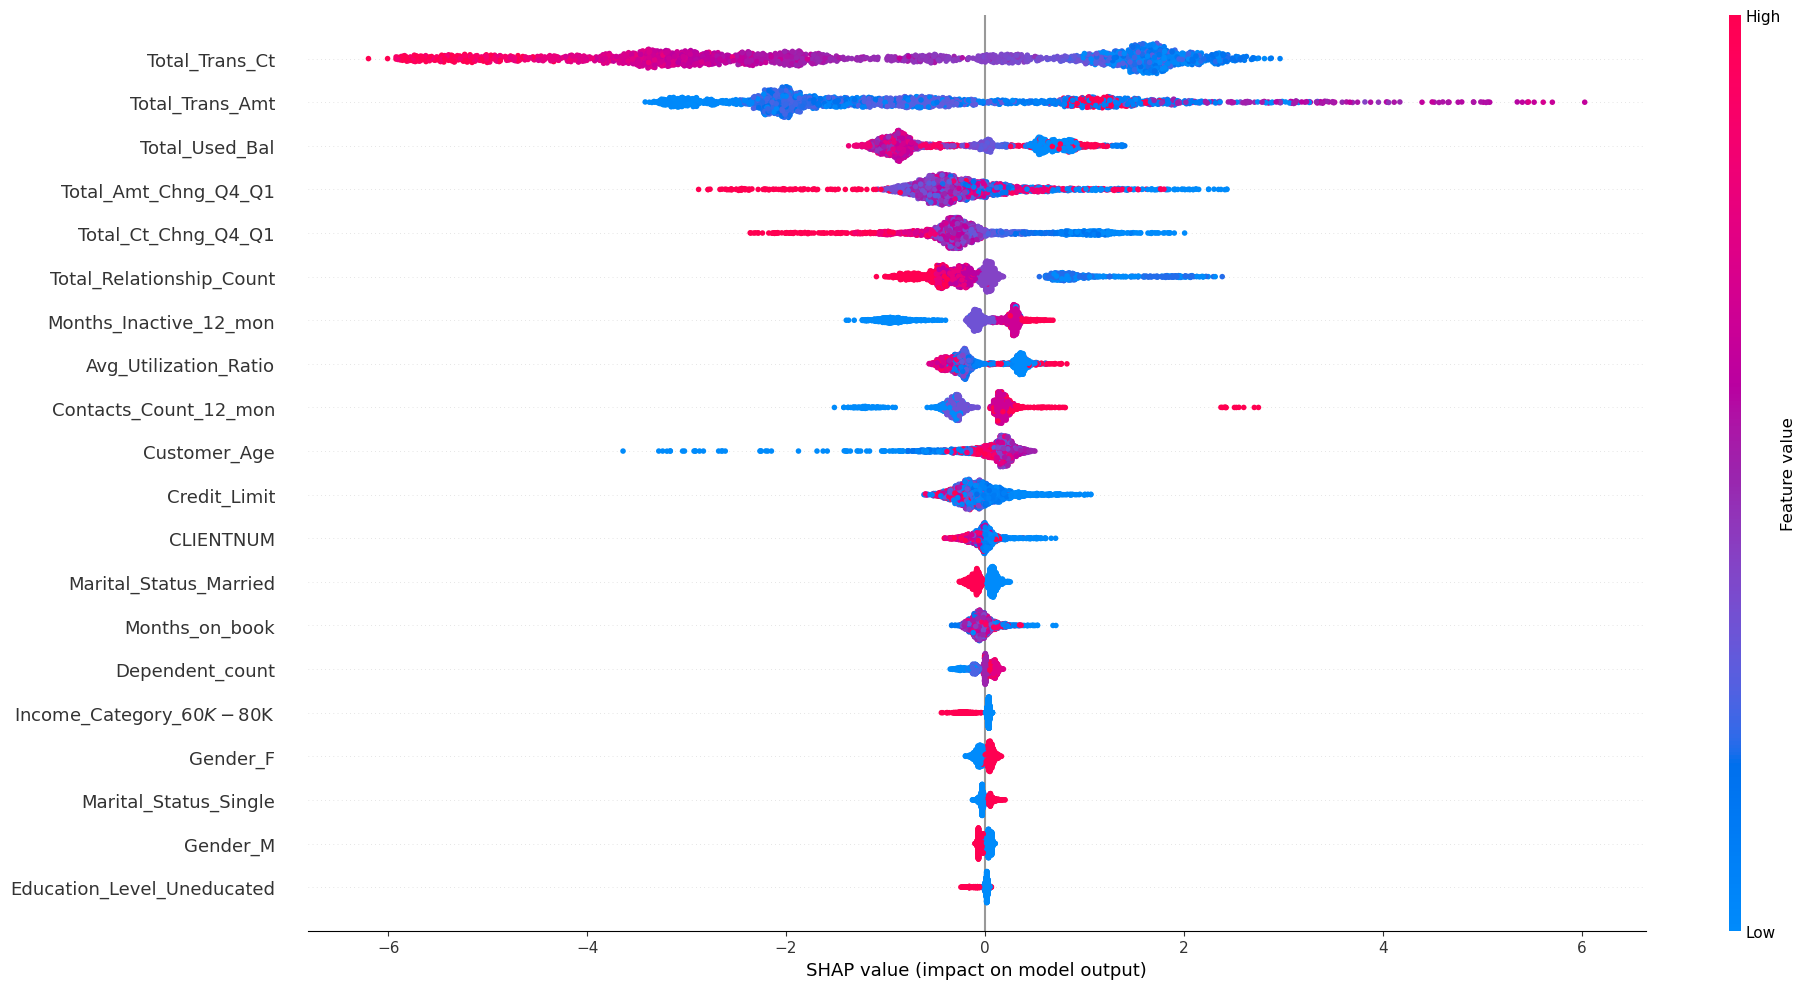

In [114]:
shap.summary_plot(shap_values,X_test,plot_size=(20,10))

In [115]:
index=123
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[index],X_test.iloc[index])

In [116]:
index=123
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[index],X_test.iloc[index],link='logit')

In [117]:
pr=pd.DataFrame()

pr['proba']=y_predict_proba_class_1

In [118]:
pr[pr['proba']==pr['proba'].max()]

,proba
881,0.99978


In [119]:
index=796
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[index],X_test.iloc[index],link='logit')

# The Challenge

#1. Identify the most probable clients that will churn in the future – who are the customers that will leave the company?

The clients with a low number of payments in the last 12 months and a high total transaction amount are most likely to churn in the future.


#2. Identify & explain churn drivers – what are the most important factors in churn?

The total number of payments made in the last 12 months (Total_Trans_Ct) and the total amount of payments made in the same period (Total_Trans_Am) are the most important factors affecting churn. 

A decrease in the Total_Trans_Ct increases the probability of churn, while an increase in this value decreases the probability. On the other hand, an increase in the Total_Trans_Am increases the probability of churn, while a decrease in this value decreases the probability.
